In [1]:
!pip install scikit-plot

In [47]:
import IPython

# Imposta il tema di colore di default a un formato diverso
IPython.Application.instance().colors = "NoColor"





In [2]:
!pip install yellowbrick

In [48]:
matplotlib_inline.backend_inline.set_matplotlib_formats('png', 'pdf')
plt.rcParams.update({'font.size': 12,
                     'xtick.labelsize' : 12,
                     'ytick.labelsize' : 12,
                     'axes.grid': False})

my_colors = plt.rcParams['axes.prop_cycle'].by_key()['color'] 

In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
import statsmodels.api as sm
from scipy.spatial import ConvexHull
from scipy.stats import normaltest, shapiro, anderson, norm, t as t_stud
from sklearn.decomposition import PCA

In [5]:
matplotlib_inline.backend_inline.set_matplotlib_formats('png', 'pdf')
plt.rcParams.update({'font.size': 12,
                     'xtick.labelsize' : 12,
                     'ytick.labelsize' : 12,
                     'axes.grid': False})

my_colors = plt.rcParams['axes.prop_cycle'].by_key()['color'] 

In [6]:
def plot_decision_boundaries(X, classes, clf, 
                             class_names: dict = None, figsize = (6, 4)):
    '''
    classes: array-like containing numerical classes
    clf: the trained classifier
    class_names: dict mapping class numbers to class names    
    '''
    
    fig = plt.figure(figsize = figsize)
    ax = fig.add_subplot()    
    x_min, y_min = X.min(axis = 0) - 1
    x_max, y_max = X.max(axis = 0) + 1
    '''
    artificial generated points evenly spaced within the region 
    delimitated by our data. x_grid and y_grid are matrices 
    containing x and y coordinates respectively.
    '''
    x_grid, y_grid = np.meshgrid(np.linspace(x_min, x_max, 1000), 
                                 np.linspace(y_min, y_max, 1000))   
    # put together x and y coordinates to build a matrix of (x,y) points
    xy_coordinates = np.vstack((x_grid.ravel(), y_grid.ravel())).T  
    # predictions of the artificial points
    pred = clf.predict(xy_coordinates) # 1d array with size=100_000  
    # Plot decision boundary and scatter plot
    contourf = ax.contourf(x_grid, y_grid, pred.reshape(1000, 1000), alpha = 0.6)    
    scatter = ax.scatter(X[:, 0], X[:, 1], c = classes, edgecolor = 'k')
    handles, labels = scatter.legend_elements()
    if class_names is not None:
        # each item in labels has the format '$\\mathdefault{number}$'
        keys = [int(''.join(filter(str.isdigit, string))) for string in labels] 
        labels = [class_names[i] for i in keys]
    ax.legend(handles, labels, loc = 'lower center', ncol = 2, 
              fontsize = 'small', bbox_to_anchor = (0, 1, 1, 1)) 
    ax.set_xlabel('1st Component', fontsize = 14)
    ax.set_ylabel('2nd Component', fontsize = 14)
    ax.set_xticks([])
    ax.set_yticks([])

In [7]:
# we use the dataset without duplicated columns

X_train = pd.read_csv('X_train_no_red.csv', header = 0)
y_train = pd.read_fwf('y_train.txt', header = None)
X_test = pd.read_csv('X_test_no_red.csv', header = 0)
y_test = pd.read_fwf('y_test.txt', header = None)

In [8]:
#X_train.columns = X_train.columns.astype(int)
y_train.columns = y_train.columns.astype(int)
X_test.columns = X_test.columns.astype(int)

In [9]:
type(y_train), type(X_train), type(y_test), type(X_test)

(pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame)

In [10]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [11]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.121711,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,0.074472,-0.376278,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784
2943,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,0.101859,-0.320418,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412
2944,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.066249,-0.118854,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184
2945,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.046467,-0.205445,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563


In [12]:
X_train.columns = X_train.columns.astype(int)
X_test.columns = X_test.columns.astype(int)

In [13]:
with open("features.txt") as f:
    lines = f.read().splitlines() 

In [14]:
features = {}
for line in lines:
    idx, name = line.split()
    features[int(idx)-1] = name

In [15]:
with open('activity_labels.txt') as f:
    lines = f.read().splitlines()

activities = {}
for line in lines:
    label, activity = line.split()
    activities[int(label)] = activity

In [ ]:
X_test.shape

In [ ]:
activities

In [ ]:
features

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from scikitplot.metrics import plot_precision_recall, plot_roc, plot_cumulative_gain, plot_lift_curve
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split

In [18]:
y_train.shape, X_train.shape, y_test.shape, X_test.shape

((7352, 1), (7352, 540), (2947, 1), (2947, 540))

In [19]:
def test_PCA_Boundary_train(dataset, classifier, title):
    #attributes = [col for col in dataset.columns if col != class_name]
    #X = dataset[attributes].values
    #y = dataset[class_name].values
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000)

    pca = PCA(n_components=2)
    pca.fit(X_train)
    X_train_pca = pca.transform(X_train)

    print(X_train_pca.shape)
    plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
    plt.show()

    X_test_pca = pca.transform(X_test)

    viz = DecisionViz(
        classifier, title=title,
        features=['Feature One', 'Feature Two'], classes=['0', '1']
    )
    viz.fit(X_train_pca, y_train)
    viz.draw(X_test_pca, y_test)
    viz.draw(X_train_pca, y_train)
    viz.show()

    print("_________________________________________________________________")
def test_PCA_Boundary_test(dataset, classifier, title):
    #attributes = [col for col in dataset.columns if col != class_name]
    #X = dataset[attributes].values
    #y = dataset[class_name].values
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000)

    pca = PCA(n_components=2)
    pca.fit(X_train)
    X_train_pca = pca.transform(X_train)

    print(X_train_pca.shape)
    plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
    plt.show()

    X_test_pca = pca.transform(X_test)

    viz = DecisionViz(
        classifier, title=title,
        features=['Feature One', 'Feature Two'], classes=['0', '1']
    )
    viz.fit(X_train_pca, y_train)
    viz.draw(X_test_pca, y_test)
    viz.draw(X_train_pca, y_train)
    viz.show()

    print("_________________________________________________________________")

def result_PCA(dataset, classifier):
    #attributes = [col for col in dataset.columns if col != class_name]
    #X = dataset[attributes].values
    #y = dataset[class_name].values
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000)

    pca = PCA(n_components=40)
    pca.fit(X_train)
    X_train_pca = pca.transform(X_train)

    print(X_train_pca.shape)
    #plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
    #plt.show()

    X_test_pca = pca.transform(X_test)

    clf = classifier
    clf.fit(X_train_pca, y_train)

    y_pred = clf.predict(X_test_pca)

    print('Accuracy %s' % accuracy_score(y_test, y_pred))
    print("_________________________________________________________________")

In [20]:
##FEATURE PROJECTED

In [21]:
from sklearn.decomposition import PCA
from itertools import product
from yellowbrick.datasets import load_credit
from yellowbrick.features import PCA as yPCA

from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons
from sklearn.neighbors import KNeighborsClassifier
from yellowbrick.contrib.classifier import DecisionViz
from sklearn.naive_bayes import GaussianNB

# FEATURE EXTRACTION


# VARIANCE THRESHOLD

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from scikitplot.metrics import plot_precision_recall, plot_roc, plot_cumulative_gain, plot_lift_curve
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, classification_report
from sklearn.feature_selection import VarianceThreshold

DECISION TREE

In [42]:
def test_threshold(classifier):
    ran = [0.03, 0.04, 0.05, 0.10, 0.15, 0.18, 0.19, 0.2,0.3,0.4,0.5]
    print(classifier)
    for i in ran:
        print(i)
        sel = VarianceThreshold(i)
        X_train_sel = sel.fit_transform(X_train)

        print(X_train_sel.shape)
        X_test_sel = sel.transform(X_test)

        clf = classifier
        #DecisionTreeClassifier(min_samples_leaf=3, random_state=1000)
        clf.fit(X_train_sel, y_train)

        y_pred = clf.predict(X_test_sel)

        print('Accuracy %s' % accuracy_score(y_test, y_pred))
        print('F1-score %s' % f1_score(y_test, y_pred, average=None))
        print(classification_report(y_test, y_pred, 
      target_names = activities.values()))

print("-----------Decision tree-----------")
test_threshold(DecisionTreeClassifier(min_samples_leaf=1, min_samples_split= 2, max_depth=2, criterion="gini", random_state=1000))
#print("-----------KNN-----------")
#test_threshold(KNeighborsClassifier(n_neighbors=5))


-----------Decision tree-----------
DecisionTreeClassifier(max_depth=2, random_state=1000)
0.03
(7352, 421)
Accuracy 0.5310485239226331
F1-score [0.52681891 0.         0.         0.         0.68424437 1.        ]
                    precision    recall  f1-score   support

           WALKING       0.36      1.00      0.53       496
  WALKING_UPSTAIRS       0.00      0.00      0.00       471
WALKING_DOWNSTAIRS       0.00      0.00      0.00       420
           SITTING       0.00      0.00      0.00       491
          STANDING       0.52      1.00      0.68       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.53      2947
         macro avg       0.31      0.50      0.37      2947
      weighted avg       0.34      0.53      0.39      2947

0.04
(7352, 386)


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy 0.5310485239226331
F1-score [0.52681891 0.         0.         0.         0.68424437 1.        ]
                    precision    recall  f1-score   support

           WALKING       0.36      1.00      0.53       496
  WALKING_UPSTAIRS       0.00      0.00      0.00       471
WALKING_DOWNSTAIRS       0.00      0.00      0.00       420
           SITTING       0.00      0.00      0.00       491
          STANDING       0.52      1.00      0.68       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.53      2947
         macro avg       0.31      0.50      0.37      2947
      weighted avg       0.34      0.53      0.39      2947

0.05
(7352, 348)


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy 0.5310485239226331
F1-score [0.52681891 0.         0.         0.         0.68424437 1.        ]
                    precision    recall  f1-score   support

           WALKING       0.36      1.00      0.53       496
  WALKING_UPSTAIRS       0.00      0.00      0.00       471
WALKING_DOWNSTAIRS       0.00      0.00      0.00       420
           SITTING       0.00      0.00      0.00       491
          STANDING       0.52      1.00      0.68       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.53      2947
         macro avg       0.31      0.50      0.37      2947
      weighted avg       0.34      0.53      0.39      2947

0.1
(7352, 175)


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy 0.5310485239226331
F1-score [0.52681891 0.         0.         0.         0.68424437 1.        ]
                    precision    recall  f1-score   support

           WALKING       0.36      1.00      0.53       496
  WALKING_UPSTAIRS       0.00      0.00      0.00       471
WALKING_DOWNSTAIRS       0.00      0.00      0.00       420
           SITTING       0.00      0.00      0.00       491
          STANDING       0.52      1.00      0.68       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.53      2947
         macro avg       0.31      0.50      0.37      2947
      weighted avg       0.34      0.53      0.39      2947

0.15
(7352, 102)
Accuracy 0.5310485239226331
F1-score [0.52681891 0.         0.         0.         0.68424437 1.        ]
                    precision    recall  f1-score   support

           WALKING       0.36      1.00      0.53       496
  WALKING_UPSTAIRS       0.00      0.00      0.00

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\

(7352, 69)
Accuracy 0.5310485239226331
F1-score [0.52681891 0.         0.         0.         0.68424437 1.        ]
                    precision    recall  f1-score   support

           WALKING       0.36      1.00      0.53       496
  WALKING_UPSTAIRS       0.00      0.00      0.00       471
WALKING_DOWNSTAIRS       0.00      0.00      0.00       420
           SITTING       0.00      0.00      0.00       491
          STANDING       0.52      1.00      0.68       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.53      2947
         macro avg       0.31      0.50      0.37      2947
      weighted avg       0.34      0.53      0.39      2947

0.19
(7352, 60)
Accuracy 0.5310485239226331
F1-score [0.52681891 0.         0.         0.         0.68424437 1.        ]
                    precision    recall  f1-score   support

           WALKING       0.36      1.00      0.53       496
  WALKING_UPSTAIRS       0.00      0.00

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\

(7352, 53)
Accuracy 0.5310485239226331
F1-score [0.52681891 0.         0.         0.         0.68424437 1.        ]
                    precision    recall  f1-score   support

           WALKING       0.36      1.00      0.53       496
  WALKING_UPSTAIRS       0.00      0.00      0.00       471
WALKING_DOWNSTAIRS       0.00      0.00      0.00       420
           SITTING       0.00      0.00      0.00       491
          STANDING       0.52      1.00      0.68       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.53      2947
         macro avg       0.31      0.50      0.37      2947
      weighted avg       0.34      0.53      0.39      2947

0.3
(7352, 27)
Accuracy 0.5307091957923312
F1-score [0.52625995 0.         0.         0.         0.68468468 0.99906803]
                    precision    recall  f1-score   support

           WALKING       0.36      1.00      0.53       496
  WALKING_UPSTAIRS       0.00      0.00 

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\

(7352, 5)
Accuracy 0.4353579911774686
F1-score [0.54420922 0.         0.53084648 0.         0.3960396  0.56948734]
                    precision    recall  f1-score   support

           WALKING       0.39      0.88      0.54       496
  WALKING_UPSTAIRS       0.00      0.00      0.00       471
WALKING_DOWNSTAIRS       0.67      0.44      0.53       420
           SITTING       0.00      0.00      0.00       491
          STANDING       0.42      0.38      0.40       532
            LAYING       0.43      0.86      0.57       537

          accuracy                           0.44      2947
         macro avg       0.32      0.43      0.34      2947
      weighted avg       0.31      0.44      0.34      2947

-----------KNN-----------
KNeighborsClassifier()
0.03
(7352, 421)
Unexpected exception formatting exception. Falling back to standard exception


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
Traceback (most recent call last):
  File "C:\Users\Dell\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3505, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Dell\AppData\Local\Temp\ipykernel_13060\1107258845.py", line 26, in <module>
    test_threshold(KNeighborsClassifier(n_neighbors=5))
  File "C:\Users\Dell\AppData\Local\Temp\ipykernel_13060\1107258845.py", line 16, in test_threshold
    y_pred = clf.predict(X_test_sel)
  File "C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 234, in predict
    neigh_ind = self.kneighbors(X, return_distance=False)
  File "C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 

K- NEAREST NEIGHBOUR

In [68]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)

In [69]:
X_test_pca = pca.transform(X_test)

In [70]:

ran = [0.03, 0.04, 0.05, 0.10, 0.15, 0.18, 0.19, 0.2,0.3,0.4,0.5]
for i in ran:
    sel = VarianceThreshold(i)
    X_train_sel = sel.fit_transform(X_train_pca)
    print(X_train_sel.shape)
    X_test_sel = sel.transform(X_test_pca)

    clf = KNeighborsClassifier(n_neighbors=5)
    #DecisionTreeClassifier(min_samples_leaf=3, random_state=1000)
    clf.fit(X_train_sel, y_train)

    y_pred = clf.predict(X_test_sel)
    print('Accuracy %s' % accuracy_score(y_test, y_pred))
    print('F1-score %s' % f1_score(y_test, y_pred, average=None))
    print(classification_report(y_test, y_pred, 
      target_names = activities.values()))

(7352, 2)
Accuracy 0.5415676959619953
F1-score [0.66231648 0.78300804 0.45655376 0.38120567 0.47359155 0.49180328]
                    precision    recall  f1-score   support

           WALKING       0.56      0.82      0.66       496
  WALKING_UPSTAIRS       0.85      0.72      0.78       471
WALKING_DOWNSTAIRS       0.60      0.37      0.46       420
           SITTING       0.34      0.44      0.38       491
          STANDING       0.45      0.51      0.47       532
            LAYING       0.66      0.39      0.49       537

          accuracy                           0.54      2947
         macro avg       0.58      0.54      0.54      2947
      weighted avg       0.57      0.54      0.54      2947

(7352, 2)
Accuracy 0.5415676959619953
F1-score [0.66231648 0.78300804 0.45655376 0.38120567 0.47359155 0.49180328]
                    precision    recall  f1-score   support

           WALKING       0.56      0.82      0.66       496
  WALKING_UPSTAIRS       0.85      0.72      0

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

Accuracy 0.5415676959619953
F1-score [0.66231648 0.78300804 0.45655376 0.38120567 0.47359155 0.49180328]
                    precision    recall  f1-score   support

           WALKING       0.56      0.82      0.66       496
  WALKING_UPSTAIRS       0.85      0.72      0.78       471
WALKING_DOWNSTAIRS       0.60      0.37      0.46       420
           SITTING       0.34      0.44      0.38       491
          STANDING       0.45      0.51      0.47       532
            LAYING       0.66      0.39      0.49       537

          accuracy                           0.54      2947
         macro avg       0.58      0.54      0.54      2947
      weighted avg       0.57      0.54      0.54      2947

(7352, 2)
Accuracy 0.5415676959619953
F1-score [0.66231648 0.78300804 0.45655376 0.38120567 0.47359155 0.49180328]
                    precision    recall  f1-score   support

           WALKING       0.56      0.82      0.66       496
  WALKING_UPSTAIRS       0.85      0.72      0.78       

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

Accuracy 0.5415676959619953
F1-score [0.66231648 0.78300804 0.45655376 0.38120567 0.47359155 0.49180328]
                    precision    recall  f1-score   support

           WALKING       0.56      0.82      0.66       496
  WALKING_UPSTAIRS       0.85      0.72      0.78       471
WALKING_DOWNSTAIRS       0.60      0.37      0.46       420
           SITTING       0.34      0.44      0.38       491
          STANDING       0.45      0.51      0.47       532
            LAYING       0.66      0.39      0.49       537

          accuracy                           0.54      2947
         macro avg       0.58      0.54      0.54      2947
      weighted avg       0.57      0.54      0.54      2947

(7352, 2)
Accuracy 0.5415676959619953
F1-score [0.66231648 0.78300804 0.45655376 0.38120567 0.47359155 0.49180328]
                    precision    recall  f1-score   support

           WALKING       0.56      0.82      0.66       496
  WALKING_UPSTAIRS       0.85      0.72      0.78       

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [43]:
print("-----------Logistic Regression-----------")
test_threshold(LogisticRegression(random_state=0))

-----------Logistic Regression-----------
LogisticRegression(random_state=0)
0.03
(7352, 421)


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using

Accuracy 0.9579233118425518
F1-score [0.96070727 0.95238095 0.97005988 0.92521368 0.93766938 1.        ]
                    precision    recall  f1-score   support

           WALKING       0.94      0.99      0.96       496
  WALKING_UPSTAIRS       0.97      0.93      0.95       471
WALKING_DOWNSTAIRS       0.98      0.96      0.97       420
           SITTING       0.97      0.88      0.93       491
          STANDING       0.90      0.98      0.94       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947

0.04
(7352, 386)


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy 0.9565659993213438
F1-score [0.95968535 0.95021645 0.96650718 0.92340426 0.93744334 1.        ]
                    precision    recall  f1-score   support

           WALKING       0.94      0.98      0.96       496
  WALKING_UPSTAIRS       0.97      0.93      0.95       471
WALKING_DOWNSTAIRS       0.97      0.96      0.97       420
           SITTING       0.97      0.88      0.92       491
          STANDING       0.91      0.97      0.94       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947

0.05
(7352, 348)


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy 0.9596199524940617
F1-score [0.96237624 0.95680346 0.96904762 0.92688172 0.94075404 1.        ]
                    precision    recall  f1-score   support

           WALKING       0.95      0.98      0.96       496
  WALKING_UPSTAIRS       0.97      0.94      0.96       471
WALKING_DOWNSTAIRS       0.97      0.97      0.97       420
           SITTING       0.98      0.88      0.93       491
          STANDING       0.90      0.98      0.94       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947

0.1
(7352, 175)


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy 0.9470648116728877
F1-score [0.9502439  0.93126386 0.96470588 0.90851064 0.92475068 1.        ]
                    precision    recall  f1-score   support

           WALKING       0.92      0.98      0.95       496
  WALKING_UPSTAIRS       0.97      0.89      0.93       471
WALKING_DOWNSTAIRS       0.95      0.98      0.96       420
           SITTING       0.95      0.87      0.91       491
          STANDING       0.89      0.96      0.92       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.95      2947
         macro avg       0.95      0.95      0.95      2947
      weighted avg       0.95      0.95      0.95      2947

0.15
(7352, 102)


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy 0.9297590770274856
F1-score [0.93063584 0.89832402 0.93380615 0.89596603 0.91173794 1.        ]
                    precision    recall  f1-score   support

           WALKING       0.89      0.97      0.93       496
  WALKING_UPSTAIRS       0.95      0.85      0.90       471
WALKING_DOWNSTAIRS       0.93      0.94      0.93       420
           SITTING       0.94      0.86      0.90       491
          STANDING       0.88      0.94      0.91       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.93      2947
         macro avg       0.93      0.93      0.93      2947
      weighted avg       0.93      0.93      0.93      2947

0.18
(7352, 69)


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy 0.9284017645062775
F1-score [0.9271137  0.90929204 0.92434988 0.89266738 0.90991811 0.99906977]
                    precision    recall  f1-score   support

           WALKING       0.89      0.96      0.93       496
  WALKING_UPSTAIRS       0.95      0.87      0.91       471
WALKING_DOWNSTAIRS       0.92      0.93      0.92       420
           SITTING       0.93      0.86      0.89       491
          STANDING       0.88      0.94      0.91       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.93      2947
         macro avg       0.93      0.93      0.93      2947
      weighted avg       0.93      0.93      0.93      2947

0.19
(7352, 60)


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy 0.9328130302002036
F1-score [0.93579767 0.91827957 0.94275274 0.89006342 0.90676417 0.99906977]
                    precision    recall  f1-score   support

           WALKING       0.90      0.97      0.94       496
  WALKING_UPSTAIRS       0.93      0.91      0.92       471
WALKING_DOWNSTAIRS       0.97      0.92      0.94       420
           SITTING       0.93      0.86      0.89       491
          STANDING       0.88      0.93      0.91       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.93      2947
         macro avg       0.93      0.93      0.93      2947
      weighted avg       0.93      0.93      0.93      2947

0.2
(7352, 53)


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy 0.9229725144214456
F1-score [0.90699904 0.88937093 0.9298893  0.89567966 0.9094236  1.        ]
                    precision    recall  f1-score   support

           WALKING       0.86      0.95      0.91       496
  WALKING_UPSTAIRS       0.91      0.87      0.89       471
WALKING_DOWNSTAIRS       0.96      0.90      0.93       420
           SITTING       0.93      0.87      0.90       491
          STANDING       0.89      0.93      0.91       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.92      2947
         macro avg       0.92      0.92      0.92      2947
      weighted avg       0.92      0.92      0.92      2947

0.3
(7352, 27)


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy 0.8781812012215813
F1-score [0.86864813 0.8516129  0.81885856 0.83842795 0.86910062 0.99814126]
                    precision    recall  f1-score   support

           WALKING       0.83      0.91      0.87       496
  WALKING_UPSTAIRS       0.86      0.84      0.85       471
WALKING_DOWNSTAIRS       0.85      0.79      0.82       420
           SITTING       0.90      0.78      0.84       491
          STANDING       0.83      0.92      0.87       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.88      2947
         macro avg       0.88      0.87      0.87      2947
      weighted avg       0.88      0.88      0.88      2947

0.4
(7352, 16)
Accuracy 0.832711231761113
F1-score [0.82790698 0.80916031 0.79288437 0.74587459 0.79575597 0.99906977]
                    precision    recall  f1-score   support

           WALKING       0.77      0.90      0.83       496
  WALKING_UPSTAIRS       0.83      0.79      0.81   

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max

# UNIVARIATE FEATURE SELECTION

In [44]:
from sklearn.feature_selection import SelectKBest


In [45]:
for i in range(20,120):
    sel = SelectKBest(k=i)
    print(str(i))
    X_train_sel = sel.fit_transform(X_train, y_train)
    X_train_sel.shape
    X_test_sel = sel.transform(X_test)

    clf = DecisionTreeClassifier(min_samples_leaf=1, min_samples_split= 2, max_depth=2, criterion="gini", random_state=10000)
    clf.fit(X_train_sel, y_train)
    y_pred = clf.predict(X_test_sel)
    print('DecisionTree - Accuracy %s' % accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred, 
      target_names = activities.values()))

20
DecisionTree - Accuracy 0.5310485239226331
                    precision    recall  f1-score   support

           WALKING       0.36      1.00      0.53       496
  WALKING_UPSTAIRS       0.00      0.00      0.00       471
WALKING_DOWNSTAIRS       0.00      0.00      0.00       420
           SITTING       0.00      0.00      0.00       491
          STANDING       0.52      1.00      0.68       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.53      2947
         macro avg       0.31      0.50      0.37      2947
      weighted avg       0.34      0.53      0.39      2947

21
DecisionTree - Accuracy 0.5310485239226331
                    precision    recall  f1-score   support

           WALKING       0.36      1.00      0.53       496
  WALKING_UPSTAIRS       0.00      0.00      0.00       471
WALKING_DOWNSTAIRS       0.00      0.00      0.00       420
           SITTING       0.00      0.00      0.00       491
    

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: 

DecisionTree - Accuracy 0.5310485239226331
                    precision    recall  f1-score   support

           WALKING       0.36      1.00      0.53       496
  WALKING_UPSTAIRS       0.00      0.00      0.00       471
WALKING_DOWNSTAIRS       0.00      0.00      0.00       420
           SITTING       0.00      0.00      0.00       491
          STANDING       0.52      1.00      0.68       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.53      2947
         macro avg       0.31      0.50      0.37      2947
      weighted avg       0.34      0.53      0.39      2947

23
DecisionTree - Accuracy 0.5310485239226331
                    precision    recall  f1-score   support

           WALKING       0.36      1.00      0.53       496
  WALKING_UPSTAIRS       0.00      0.00      0.00       471
WALKING_DOWNSTAIRS       0.00      0.00      0.00       420
           SITTING       0.00      0.00      0.00       491
       

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\va

DecisionTree - Accuracy 0.5310485239226331
                    precision    recall  f1-score   support

           WALKING       0.36      1.00      0.53       496
  WALKING_UPSTAIRS       0.00      0.00      0.00       471
WALKING_DOWNSTAIRS       0.00      0.00      0.00       420
           SITTING       0.00      0.00      0.00       491
          STANDING       0.52      1.00      0.68       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.53      2947
         macro avg       0.31      0.50      0.37      2947
      weighted avg       0.34      0.53      0.39      2947

26
DecisionTree - Accuracy 0.5310485239226331
                    precision    recall  f1-score   support

           WALKING       0.36      1.00      0.53       496
  WALKING_UPSTAIRS       0.00      0.00      0.00       471
WALKING_DOWNSTAIRS       0.00      0.00      0.00       420
           SITTING       0.00      0.00      0.00       491
       

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\va

DecisionTree - Accuracy 0.5310485239226331
                    precision    recall  f1-score   support

           WALKING       0.36      1.00      0.53       496
  WALKING_UPSTAIRS       0.00      0.00      0.00       471
WALKING_DOWNSTAIRS       0.00      0.00      0.00       420
           SITTING       0.00      0.00      0.00       491
          STANDING       0.52      1.00      0.68       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.53      2947
         macro avg       0.31      0.50      0.37      2947
      weighted avg       0.34      0.53      0.39      2947

29
DecisionTree - Accuracy 0.5310485239226331
                    precision    recall  f1-score   support

           WALKING       0.36      1.00      0.53       496
  WALKING_UPSTAIRS       0.00      0.00      0.00       471
WALKING_DOWNSTAIRS       0.00      0.00      0.00       420
           SITTING       0.00      0.00      0.00       491
       

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\va

DecisionTree - Accuracy 0.5310485239226331
                    precision    recall  f1-score   support

           WALKING       0.36      1.00      0.53       496
  WALKING_UPSTAIRS       0.00      0.00      0.00       471
WALKING_DOWNSTAIRS       0.00      0.00      0.00       420
           SITTING       0.00      0.00      0.00       491
          STANDING       0.52      1.00      0.68       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.53      2947
         macro avg       0.31      0.50      0.37      2947
      weighted avg       0.34      0.53      0.39      2947

32
DecisionTree - Accuracy 0.5310485239226331
                    precision    recall  f1-score   support

           WALKING       0.36      1.00      0.53       496
  WALKING_UPSTAIRS       0.00      0.00      0.00       471
WALKING_DOWNSTAIRS       0.00      0.00      0.00       420
           SITTING       0.00      0.00      0.00       491
       

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\va

                    precision    recall  f1-score   support

           WALKING       0.36      1.00      0.53       496
  WALKING_UPSTAIRS       0.00      0.00      0.00       471
WALKING_DOWNSTAIRS       0.00      0.00      0.00       420
           SITTING       0.00      0.00      0.00       491
          STANDING       0.52      1.00      0.68       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.53      2947
         macro avg       0.31      0.50      0.37      2947
      weighted avg       0.34      0.53      0.39      2947

36
DecisionTree - Accuracy 0.5310485239226331
                    precision    recall  f1-score   support

           WALKING       0.36      1.00      0.53       496
  WALKING_UPSTAIRS       0.00      0.00      0.00       471
WALKING_DOWNSTAIRS       0.00      0.00      0.00       420
           SITTING       0.00      0.00      0.00       491
          STANDING       0.52      1.00      0.68 

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\va

                    precision    recall  f1-score   support

           WALKING       0.36      1.00      0.53       496
  WALKING_UPSTAIRS       0.00      0.00      0.00       471
WALKING_DOWNSTAIRS       0.00      0.00      0.00       420
           SITTING       0.00      0.00      0.00       491
          STANDING       0.52      1.00      0.68       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.53      2947
         macro avg       0.31      0.50      0.37      2947
      weighted avg       0.34      0.53      0.39      2947

40
DecisionTree - Accuracy 0.5310485239226331
                    precision    recall  f1-score   support

           WALKING       0.36      1.00      0.53       496
  WALKING_UPSTAIRS       0.00      0.00      0.00       471
WALKING_DOWNSTAIRS       0.00      0.00      0.00       420
           SITTING       0.00      0.00      0.00       491
          STANDING       0.52      1.00      0.68 

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\va

DecisionTree - Accuracy 0.5310485239226331
                    precision    recall  f1-score   support

           WALKING       0.36      1.00      0.53       496
  WALKING_UPSTAIRS       0.00      0.00      0.00       471
WALKING_DOWNSTAIRS       0.00      0.00      0.00       420
           SITTING       0.00      0.00      0.00       491
          STANDING       0.52      1.00      0.68       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.53      2947
         macro avg       0.31      0.50      0.37      2947
      weighted avg       0.34      0.53      0.39      2947

44
DecisionTree - Accuracy 0.5310485239226331
                    precision    recall  f1-score   support

           WALKING       0.36      1.00      0.53       496
  WALKING_UPSTAIRS       0.00      0.00      0.00       471
WALKING_DOWNSTAIRS       0.00      0.00      0.00       420
           SITTING       0.00      0.00      0.00       491
       

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\va

DecisionTree - Accuracy 0.5310485239226331
                    precision    recall  f1-score   support

           WALKING       0.36      1.00      0.53       496
  WALKING_UPSTAIRS       0.00      0.00      0.00       471
WALKING_DOWNSTAIRS       0.00      0.00      0.00       420
           SITTING       0.00      0.00      0.00       491
          STANDING       0.52      1.00      0.68       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.53      2947
         macro avg       0.31      0.50      0.37      2947
      weighted avg       0.34      0.53      0.39      2947

46
DecisionTree - Accuracy 0.5310485239226331
                    precision    recall  f1-score   support

           WALKING       0.36      1.00      0.53       496
  WALKING_UPSTAIRS       0.00      0.00      0.00       471
WALKING_DOWNSTAIRS       0.00      0.00      0.00       420
           SITTING       0.00      0.00      0.00       491
       

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\va

DecisionTree - Accuracy 0.5310485239226331
                    precision    recall  f1-score   support

           WALKING       0.36      1.00      0.53       496
  WALKING_UPSTAIRS       0.00      0.00      0.00       471
WALKING_DOWNSTAIRS       0.00      0.00      0.00       420
           SITTING       0.00      0.00      0.00       491
          STANDING       0.52      1.00      0.68       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.53      2947
         macro avg       0.31      0.50      0.37      2947
      weighted avg       0.34      0.53      0.39      2947

48
DecisionTree - Accuracy 0.5310485239226331
                    precision    recall  f1-score   support

           WALKING       0.36      1.00      0.53       496
  WALKING_UPSTAIRS       0.00      0.00      0.00       471
WALKING_DOWNSTAIRS       0.00      0.00      0.00       420
           SITTING       0.00      0.00      0.00       491
       

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\va

DecisionTree - Accuracy 0.5310485239226331
                    precision    recall  f1-score   support

           WALKING       0.36      1.00      0.53       496
  WALKING_UPSTAIRS       0.00      0.00      0.00       471
WALKING_DOWNSTAIRS       0.00      0.00      0.00       420
           SITTING       0.00      0.00      0.00       491
          STANDING       0.52      1.00      0.68       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.53      2947
         macro avg       0.31      0.50      0.37      2947
      weighted avg       0.34      0.53      0.39      2947

50
DecisionTree - Accuracy 0.5310485239226331
                    precision    recall  f1-score   support

           WALKING       0.36      1.00      0.53       496
  WALKING_UPSTAIRS       0.00      0.00      0.00       471
WALKING_DOWNSTAIRS       0.00      0.00      0.00       420
           SITTING       0.00      0.00      0.00       491
       

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\va

DecisionTree - Accuracy 0.5310485239226331
                    precision    recall  f1-score   support

           WALKING       0.36      1.00      0.53       496
  WALKING_UPSTAIRS       0.00      0.00      0.00       471
WALKING_DOWNSTAIRS       0.00      0.00      0.00       420
           SITTING       0.00      0.00      0.00       491
          STANDING       0.52      1.00      0.68       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.53      2947
         macro avg       0.31      0.50      0.37      2947
      weighted avg       0.34      0.53      0.39      2947

52
DecisionTree - Accuracy 0.5310485239226331
                    precision    recall  f1-score   support

           WALKING       0.36      1.00      0.53       496
  WALKING_UPSTAIRS       0.00      0.00      0.00       471
WALKING_DOWNSTAIRS       0.00      0.00      0.00       420
           SITTING       0.00      0.00      0.00       491
       

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\va

DecisionTree - Accuracy 0.5310485239226331
                    precision    recall  f1-score   support

           WALKING       0.36      1.00      0.53       496
  WALKING_UPSTAIRS       0.00      0.00      0.00       471
WALKING_DOWNSTAIRS       0.00      0.00      0.00       420
           SITTING       0.00      0.00      0.00       491
          STANDING       0.52      1.00      0.68       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.53      2947
         macro avg       0.31      0.50      0.37      2947
      weighted avg       0.34      0.53      0.39      2947

54
DecisionTree - Accuracy 0.5310485239226331
                    precision    recall  f1-score   support

           WALKING       0.36      1.00      0.53       496
  WALKING_UPSTAIRS       0.00      0.00      0.00       471
WALKING_DOWNSTAIRS       0.00      0.00      0.00       420
           SITTING       0.00      0.00      0.00       491
       

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\va

DecisionTree - Accuracy 0.5310485239226331
                    precision    recall  f1-score   support

           WALKING       0.36      1.00      0.53       496
  WALKING_UPSTAIRS       0.00      0.00      0.00       471
WALKING_DOWNSTAIRS       0.00      0.00      0.00       420
           SITTING       0.00      0.00      0.00       491
          STANDING       0.52      1.00      0.68       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.53      2947
         macro avg       0.31      0.50      0.37      2947
      weighted avg       0.34      0.53      0.39      2947

56
DecisionTree - Accuracy 0.5310485239226331
                    precision    recall  f1-score   support

           WALKING       0.36      1.00      0.53       496
  WALKING_UPSTAIRS       0.00      0.00      0.00       471
WALKING_DOWNSTAIRS       0.00      0.00      0.00       420
           SITTING       0.00      0.00      0.00       491
       

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\va

DecisionTree - Accuracy 0.5310485239226331
                    precision    recall  f1-score   support

           WALKING       0.36      1.00      0.53       496
  WALKING_UPSTAIRS       0.00      0.00      0.00       471
WALKING_DOWNSTAIRS       0.00      0.00      0.00       420
           SITTING       0.00      0.00      0.00       491
          STANDING       0.52      1.00      0.68       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.53      2947
         macro avg       0.31      0.50      0.37      2947
      weighted avg       0.34      0.53      0.39      2947

58
DecisionTree - Accuracy 0.5310485239226331
                    precision    recall  f1-score   support

           WALKING       0.36      1.00      0.53       496
  WALKING_UPSTAIRS       0.00      0.00      0.00       471
WALKING_DOWNSTAIRS       0.00      0.00      0.00       420
           SITTING       0.00      0.00      0.00       491
       

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\va

DecisionTree - Accuracy 0.5310485239226331
                    precision    recall  f1-score   support

           WALKING       0.36      1.00      0.53       496
  WALKING_UPSTAIRS       0.00      0.00      0.00       471
WALKING_DOWNSTAIRS       0.00      0.00      0.00       420
           SITTING       0.00      0.00      0.00       491
          STANDING       0.52      1.00      0.68       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.53      2947
         macro avg       0.31      0.50      0.37      2947
      weighted avg       0.34      0.53      0.39      2947

60
DecisionTree - Accuracy 0.5310485239226331
                    precision    recall  f1-score   support

           WALKING       0.36      1.00      0.53       496
  WALKING_UPSTAIRS       0.00      0.00      0.00       471
WALKING_DOWNSTAIRS       0.00      0.00      0.00       420
           SITTING       0.00      0.00      0.00       491
       

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\va

DecisionTree - Accuracy 0.5310485239226331
                    precision    recall  f1-score   support

           WALKING       0.36      1.00      0.53       496
  WALKING_UPSTAIRS       0.00      0.00      0.00       471
WALKING_DOWNSTAIRS       0.00      0.00      0.00       420
           SITTING       0.00      0.00      0.00       491
          STANDING       0.52      1.00      0.68       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.53      2947
         macro avg       0.31      0.50      0.37      2947
      weighted avg       0.34      0.53      0.39      2947

62
DecisionTree - Accuracy 0.5310485239226331
                    precision    recall  f1-score   support

           WALKING       0.36      1.00      0.53       496
  WALKING_UPSTAIRS       0.00      0.00      0.00       471
WALKING_DOWNSTAIRS       0.00      0.00      0.00       420
           SITTING       0.00      0.00      0.00       491
       

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\va

DecisionTree - Accuracy 0.5310485239226331
                    precision    recall  f1-score   support

           WALKING       0.36      1.00      0.53       496
  WALKING_UPSTAIRS       0.00      0.00      0.00       471
WALKING_DOWNSTAIRS       0.00      0.00      0.00       420
           SITTING       0.00      0.00      0.00       491
          STANDING       0.52      1.00      0.68       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.53      2947
         macro avg       0.31      0.50      0.37      2947
      weighted avg       0.34      0.53      0.39      2947

64
DecisionTree - Accuracy 0.5310485239226331
                    precision    recall  f1-score   support

           WALKING       0.36      1.00      0.53       496
  WALKING_UPSTAIRS       0.00      0.00      0.00       471
WALKING_DOWNSTAIRS       0.00      0.00      0.00       420
           SITTING       0.00      0.00      0.00       491
       

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\va

DecisionTree - Accuracy 0.5310485239226331
                    precision    recall  f1-score   support

           WALKING       0.36      1.00      0.53       496
  WALKING_UPSTAIRS       0.00      0.00      0.00       471
WALKING_DOWNSTAIRS       0.00      0.00      0.00       420
           SITTING       0.00      0.00      0.00       491
          STANDING       0.52      1.00      0.68       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.53      2947
         macro avg       0.31      0.50      0.37      2947
      weighted avg       0.34      0.53      0.39      2947

66
DecisionTree - Accuracy 0.5310485239226331
                    precision    recall  f1-score   support

           WALKING       0.36      1.00      0.53       496
  WALKING_UPSTAIRS       0.00      0.00      0.00       471
WALKING_DOWNSTAIRS       0.00      0.00      0.00       420
           SITTING       0.00      0.00      0.00       491
       

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\va

DecisionTree - Accuracy 0.5310485239226331
                    precision    recall  f1-score   support

           WALKING       0.36      1.00      0.53       496
  WALKING_UPSTAIRS       0.00      0.00      0.00       471
WALKING_DOWNSTAIRS       0.00      0.00      0.00       420
           SITTING       0.00      0.00      0.00       491
          STANDING       0.52      1.00      0.68       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.53      2947
         macro avg       0.31      0.50      0.37      2947
      weighted avg       0.34      0.53      0.39      2947

68
DecisionTree - Accuracy 0.5310485239226331
                    precision    recall  f1-score   support

           WALKING       0.36      1.00      0.53       496
  WALKING_UPSTAIRS       0.00      0.00      0.00       471
WALKING_DOWNSTAIRS       0.00      0.00      0.00       420
           SITTING       0.00      0.00      0.00       491
       

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\va

DecisionTree - Accuracy 0.5310485239226331
                    precision    recall  f1-score   support

           WALKING       0.36      1.00      0.53       496
  WALKING_UPSTAIRS       0.00      0.00      0.00       471
WALKING_DOWNSTAIRS       0.00      0.00      0.00       420
           SITTING       0.00      0.00      0.00       491
          STANDING       0.52      1.00      0.68       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.53      2947
         macro avg       0.31      0.50      0.37      2947
      weighted avg       0.34      0.53      0.39      2947

70
DecisionTree - Accuracy 0.5310485239226331
                    precision    recall  f1-score   support

           WALKING       0.36      1.00      0.53       496
  WALKING_UPSTAIRS       0.00      0.00      0.00       471
WALKING_DOWNSTAIRS       0.00      0.00      0.00       420
           SITTING       0.00      0.00      0.00       491
       

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\va

DecisionTree - Accuracy 0.5310485239226331
                    precision    recall  f1-score   support

           WALKING       0.36      1.00      0.53       496
  WALKING_UPSTAIRS       0.00      0.00      0.00       471
WALKING_DOWNSTAIRS       0.00      0.00      0.00       420
           SITTING       0.00      0.00      0.00       491
          STANDING       0.52      1.00      0.68       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.53      2947
         macro avg       0.31      0.50      0.37      2947
      weighted avg       0.34      0.53      0.39      2947

72
DecisionTree - Accuracy 0.5310485239226331
                    precision    recall  f1-score   support

           WALKING       0.36      1.00      0.53       496
  WALKING_UPSTAIRS       0.00      0.00      0.00       471
WALKING_DOWNSTAIRS       0.00      0.00      0.00       420
           SITTING       0.00      0.00      0.00       491
       

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\va

DecisionTree - Accuracy 0.5310485239226331
                    precision    recall  f1-score   support

           WALKING       0.36      1.00      0.53       496
  WALKING_UPSTAIRS       0.00      0.00      0.00       471
WALKING_DOWNSTAIRS       0.00      0.00      0.00       420
           SITTING       0.00      0.00      0.00       491
          STANDING       0.52      1.00      0.68       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.53      2947
         macro avg       0.31      0.50      0.37      2947
      weighted avg       0.34      0.53      0.39      2947

74
DecisionTree - Accuracy 0.5310485239226331
                    precision    recall  f1-score   support

           WALKING       0.36      1.00      0.53       496
  WALKING_UPSTAIRS       0.00      0.00      0.00       471
WALKING_DOWNSTAIRS       0.00      0.00      0.00       420
           SITTING       0.00      0.00      0.00       491
       

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\va

DecisionTree - Accuracy 0.5310485239226331
                    precision    recall  f1-score   support

           WALKING       0.36      1.00      0.53       496
  WALKING_UPSTAIRS       0.00      0.00      0.00       471
WALKING_DOWNSTAIRS       0.00      0.00      0.00       420
           SITTING       0.00      0.00      0.00       491
          STANDING       0.52      1.00      0.68       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.53      2947
         macro avg       0.31      0.50      0.37      2947
      weighted avg       0.34      0.53      0.39      2947

76
DecisionTree - Accuracy 0.5310485239226331
                    precision    recall  f1-score   support

           WALKING       0.36      1.00      0.53       496
  WALKING_UPSTAIRS       0.00      0.00      0.00       471
WALKING_DOWNSTAIRS       0.00      0.00      0.00       420
           SITTING       0.00      0.00      0.00       491
       

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\va

DecisionTree - Accuracy 0.5310485239226331
                    precision    recall  f1-score   support

           WALKING       0.36      1.00      0.53       496
  WALKING_UPSTAIRS       0.00      0.00      0.00       471
WALKING_DOWNSTAIRS       0.00      0.00      0.00       420
           SITTING       0.00      0.00      0.00       491
          STANDING       0.52      1.00      0.68       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.53      2947
         macro avg       0.31      0.50      0.37      2947
      weighted avg       0.34      0.53      0.39      2947

78
DecisionTree - Accuracy 0.5310485239226331
                    precision    recall  f1-score   support

           WALKING       0.36      1.00      0.53       496
  WALKING_UPSTAIRS       0.00      0.00      0.00       471
WALKING_DOWNSTAIRS       0.00      0.00      0.00       420
           SITTING       0.00      0.00      0.00       491
       

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\va

DecisionTree - Accuracy 0.5310485239226331
                    precision    recall  f1-score   support

           WALKING       0.36      1.00      0.53       496
  WALKING_UPSTAIRS       0.00      0.00      0.00       471
WALKING_DOWNSTAIRS       0.00      0.00      0.00       420
           SITTING       0.00      0.00      0.00       491
          STANDING       0.52      1.00      0.68       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.53      2947
         macro avg       0.31      0.50      0.37      2947
      weighted avg       0.34      0.53      0.39      2947

80
DecisionTree - Accuracy 0.5310485239226331
                    precision    recall  f1-score   support

           WALKING       0.36      1.00      0.53       496
  WALKING_UPSTAIRS       0.00      0.00      0.00       471
WALKING_DOWNSTAIRS       0.00      0.00      0.00       420
           SITTING       0.00      0.00      0.00       491
       

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\va

DecisionTree - Accuracy 0.5310485239226331
                    precision    recall  f1-score   support

           WALKING       0.36      1.00      0.53       496
  WALKING_UPSTAIRS       0.00      0.00      0.00       471
WALKING_DOWNSTAIRS       0.00      0.00      0.00       420
           SITTING       0.00      0.00      0.00       491
          STANDING       0.52      1.00      0.68       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.53      2947
         macro avg       0.31      0.50      0.37      2947
      weighted avg       0.34      0.53      0.39      2947

82
DecisionTree - Accuracy 0.5310485239226331
                    precision    recall  f1-score   support

           WALKING       0.36      1.00      0.53       496
  WALKING_UPSTAIRS       0.00      0.00      0.00       471
WALKING_DOWNSTAIRS       0.00      0.00      0.00       420
           SITTING       0.00      0.00      0.00       491
       

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\va

DecisionTree - Accuracy 0.5310485239226331
                    precision    recall  f1-score   support

           WALKING       0.36      1.00      0.53       496
  WALKING_UPSTAIRS       0.00      0.00      0.00       471
WALKING_DOWNSTAIRS       0.00      0.00      0.00       420
           SITTING       0.00      0.00      0.00       491
          STANDING       0.52      1.00      0.68       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.53      2947
         macro avg       0.31      0.50      0.37      2947
      weighted avg       0.34      0.53      0.39      2947

84
DecisionTree - Accuracy 0.5310485239226331
                    precision    recall  f1-score   support

           WALKING       0.36      1.00      0.53       496
  WALKING_UPSTAIRS       0.00      0.00      0.00       471
WALKING_DOWNSTAIRS       0.00      0.00      0.00       420
           SITTING       0.00      0.00      0.00       491
       

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\va

DecisionTree - Accuracy 0.5310485239226331
                    precision    recall  f1-score   support

           WALKING       0.36      1.00      0.53       496
  WALKING_UPSTAIRS       0.00      0.00      0.00       471
WALKING_DOWNSTAIRS       0.00      0.00      0.00       420
           SITTING       0.00      0.00      0.00       491
          STANDING       0.52      1.00      0.68       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.53      2947
         macro avg       0.31      0.50      0.37      2947
      weighted avg       0.34      0.53      0.39      2947

86
DecisionTree - Accuracy 0.5310485239226331
                    precision    recall  f1-score   support

           WALKING       0.36      1.00      0.53       496
  WALKING_UPSTAIRS       0.00      0.00      0.00       471
WALKING_DOWNSTAIRS       0.00      0.00      0.00       420
           SITTING       0.00      0.00      0.00       491
       

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\va

DecisionTree - Accuracy 0.5310485239226331
                    precision    recall  f1-score   support

           WALKING       0.36      1.00      0.53       496
  WALKING_UPSTAIRS       0.00      0.00      0.00       471
WALKING_DOWNSTAIRS       0.00      0.00      0.00       420
           SITTING       0.00      0.00      0.00       491
          STANDING       0.52      1.00      0.68       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.53      2947
         macro avg       0.31      0.50      0.37      2947
      weighted avg       0.34      0.53      0.39      2947

88
DecisionTree - Accuracy 0.5310485239226331
                    precision    recall  f1-score   support

           WALKING       0.36      1.00      0.53       496
  WALKING_UPSTAIRS       0.00      0.00      0.00       471
WALKING_DOWNSTAIRS       0.00      0.00      0.00       420
           SITTING       0.00      0.00      0.00       491
       

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\va

DecisionTree - Accuracy 0.5310485239226331
                    precision    recall  f1-score   support

           WALKING       0.36      1.00      0.53       496
  WALKING_UPSTAIRS       0.00      0.00      0.00       471
WALKING_DOWNSTAIRS       0.00      0.00      0.00       420
           SITTING       0.00      0.00      0.00       491
          STANDING       0.52      1.00      0.68       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.53      2947
         macro avg       0.31      0.50      0.37      2947
      weighted avg       0.34      0.53      0.39      2947

90
DecisionTree - Accuracy 0.5310485239226331


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\va

                    precision    recall  f1-score   support

           WALKING       0.36      1.00      0.53       496
  WALKING_UPSTAIRS       0.00      0.00      0.00       471
WALKING_DOWNSTAIRS       0.00      0.00      0.00       420
           SITTING       0.00      0.00      0.00       491
          STANDING       0.52      1.00      0.68       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.53      2947
         macro avg       0.31      0.50      0.37      2947
      weighted avg       0.34      0.53      0.39      2947

91
DecisionTree - Accuracy 0.5310485239226331
                    precision    recall  f1-score   support

           WALKING       0.36      1.00      0.53       496
  WALKING_UPSTAIRS       0.00      0.00      0.00       471
WALKING_DOWNSTAIRS       0.00      0.00      0.00       420
           SITTING       0.00      0.00      0.00       491
          STANDING       0.52      1.00      0.68 

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\va

DecisionTree - Accuracy 0.5310485239226331
                    precision    recall  f1-score   support

           WALKING       0.36      1.00      0.53       496
  WALKING_UPSTAIRS       0.00      0.00      0.00       471
WALKING_DOWNSTAIRS       0.00      0.00      0.00       420
           SITTING       0.00      0.00      0.00       491
          STANDING       0.52      1.00      0.68       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.53      2947
         macro avg       0.31      0.50      0.37      2947
      weighted avg       0.34      0.53      0.39      2947

95


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\va

DecisionTree - Accuracy 0.5310485239226331
                    precision    recall  f1-score   support

           WALKING       0.36      1.00      0.53       496
  WALKING_UPSTAIRS       0.00      0.00      0.00       471
WALKING_DOWNSTAIRS       0.00      0.00      0.00       420
           SITTING       0.00      0.00      0.00       491
          STANDING       0.52      1.00      0.68       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.53      2947
         macro avg       0.31      0.50      0.37      2947
      weighted avg       0.34      0.53      0.39      2947

96
DecisionTree - Accuracy 0.5310485239226331
                    precision    recall  f1-score   support

           WALKING       0.36      1.00      0.53       496
  WALKING_UPSTAIRS       0.00      0.00      0.00       471
WALKING_DOWNSTAIRS       0.00      0.00      0.00       420
           SITTING       0.00      0.00      0.00       491
       

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\va

DecisionTree - Accuracy 0.5310485239226331
                    precision    recall  f1-score   support

           WALKING       0.36      1.00      0.53       496
  WALKING_UPSTAIRS       0.00      0.00      0.00       471
WALKING_DOWNSTAIRS       0.00      0.00      0.00       420
           SITTING       0.00      0.00      0.00       491
          STANDING       0.52      1.00      0.68       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.53      2947
         macro avg       0.31      0.50      0.37      2947
      weighted avg       0.34      0.53      0.39      2947

98
DecisionTree - Accuracy 0.5310485239226331
                    precision    recall  f1-score   support

           WALKING       0.36      1.00      0.53       496
  WALKING_UPSTAIRS       0.00      0.00      0.00       471
WALKING_DOWNSTAIRS       0.00      0.00      0.00       420
           SITTING       0.00      0.00      0.00       491
       

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\va

DecisionTree - Accuracy 0.5310485239226331
                    precision    recall  f1-score   support

           WALKING       0.36      1.00      0.53       496
  WALKING_UPSTAIRS       0.00      0.00      0.00       471
WALKING_DOWNSTAIRS       0.00      0.00      0.00       420
           SITTING       0.00      0.00      0.00       491
          STANDING       0.52      1.00      0.68       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.53      2947
         macro avg       0.31      0.50      0.37      2947
      weighted avg       0.34      0.53      0.39      2947

100


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\va

DecisionTree - Accuracy 0.5310485239226331
                    precision    recall  f1-score   support

           WALKING       0.36      1.00      0.53       496
  WALKING_UPSTAIRS       0.00      0.00      0.00       471
WALKING_DOWNSTAIRS       0.00      0.00      0.00       420
           SITTING       0.00      0.00      0.00       491
          STANDING       0.52      1.00      0.68       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.53      2947
         macro avg       0.31      0.50      0.37      2947
      weighted avg       0.34      0.53      0.39      2947

101


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\va

DecisionTree - Accuracy 0.5310485239226331
                    precision    recall  f1-score   support

           WALKING       0.36      1.00      0.53       496
  WALKING_UPSTAIRS       0.00      0.00      0.00       471
WALKING_DOWNSTAIRS       0.00      0.00      0.00       420
           SITTING       0.00      0.00      0.00       491
          STANDING       0.52      1.00      0.68       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.53      2947
         macro avg       0.31      0.50      0.37      2947
      weighted avg       0.34      0.53      0.39      2947

102


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\va

DecisionTree - Accuracy 0.5310485239226331
                    precision    recall  f1-score   support

           WALKING       0.36      1.00      0.53       496
  WALKING_UPSTAIRS       0.00      0.00      0.00       471
WALKING_DOWNSTAIRS       0.00      0.00      0.00       420
           SITTING       0.00      0.00      0.00       491
          STANDING       0.52      1.00      0.68       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.53      2947
         macro avg       0.31      0.50      0.37      2947
      weighted avg       0.34      0.53      0.39      2947

103


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\va

DecisionTree - Accuracy 0.5310485239226331
                    precision    recall  f1-score   support

           WALKING       0.36      1.00      0.53       496
  WALKING_UPSTAIRS       0.00      0.00      0.00       471
WALKING_DOWNSTAIRS       0.00      0.00      0.00       420
           SITTING       0.00      0.00      0.00       491
          STANDING       0.52      1.00      0.68       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.53      2947
         macro avg       0.31      0.50      0.37      2947
      weighted avg       0.34      0.53      0.39      2947

104


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\va

DecisionTree - Accuracy 0.5310485239226331
                    precision    recall  f1-score   support

           WALKING       0.36      1.00      0.53       496
  WALKING_UPSTAIRS       0.00      0.00      0.00       471
WALKING_DOWNSTAIRS       0.00      0.00      0.00       420
           SITTING       0.00      0.00      0.00       491
          STANDING       0.52      1.00      0.68       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.53      2947
         macro avg       0.31      0.50      0.37      2947
      weighted avg       0.34      0.53      0.39      2947

105


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\va

DecisionTree - Accuracy 0.5310485239226331
                    precision    recall  f1-score   support

           WALKING       0.36      1.00      0.53       496
  WALKING_UPSTAIRS       0.00      0.00      0.00       471
WALKING_DOWNSTAIRS       0.00      0.00      0.00       420
           SITTING       0.00      0.00      0.00       491
          STANDING       0.52      1.00      0.68       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.53      2947
         macro avg       0.31      0.50      0.37      2947
      weighted avg       0.34      0.53      0.39      2947

106


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\va

DecisionTree - Accuracy 0.5310485239226331
                    precision    recall  f1-score   support

           WALKING       0.36      1.00      0.53       496
  WALKING_UPSTAIRS       0.00      0.00      0.00       471
WALKING_DOWNSTAIRS       0.00      0.00      0.00       420
           SITTING       0.00      0.00      0.00       491
          STANDING       0.52      1.00      0.68       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.53      2947
         macro avg       0.31      0.50      0.37      2947
      weighted avg       0.34      0.53      0.39      2947

107


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\va

DecisionTree - Accuracy 0.5310485239226331
                    precision    recall  f1-score   support

           WALKING       0.36      1.00      0.53       496
  WALKING_UPSTAIRS       0.00      0.00      0.00       471
WALKING_DOWNSTAIRS       0.00      0.00      0.00       420
           SITTING       0.00      0.00      0.00       491
          STANDING       0.52      1.00      0.68       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.53      2947
         macro avg       0.31      0.50      0.37      2947
      weighted avg       0.34      0.53      0.39      2947

108


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\va

DecisionTree - Accuracy 0.5310485239226331
                    precision    recall  f1-score   support

           WALKING       0.36      1.00      0.53       496
  WALKING_UPSTAIRS       0.00      0.00      0.00       471
WALKING_DOWNSTAIRS       0.00      0.00      0.00       420
           SITTING       0.00      0.00      0.00       491
          STANDING       0.52      1.00      0.68       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.53      2947
         macro avg       0.31      0.50      0.37      2947
      weighted avg       0.34      0.53      0.39      2947

109


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\va

DecisionTree - Accuracy 0.5310485239226331
                    precision    recall  f1-score   support

           WALKING       0.36      1.00      0.53       496
  WALKING_UPSTAIRS       0.00      0.00      0.00       471
WALKING_DOWNSTAIRS       0.00      0.00      0.00       420
           SITTING       0.00      0.00      0.00       491
          STANDING       0.52      1.00      0.68       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.53      2947
         macro avg       0.31      0.50      0.37      2947
      weighted avg       0.34      0.53      0.39      2947

110


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\va

DecisionTree - Accuracy 0.5310485239226331
                    precision    recall  f1-score   support

           WALKING       0.36      1.00      0.53       496
  WALKING_UPSTAIRS       0.00      0.00      0.00       471
WALKING_DOWNSTAIRS       0.00      0.00      0.00       420
           SITTING       0.00      0.00      0.00       491
          STANDING       0.52      1.00      0.68       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.53      2947
         macro avg       0.31      0.50      0.37      2947
      weighted avg       0.34      0.53      0.39      2947

111


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\va

DecisionTree - Accuracy 0.5310485239226331
                    precision    recall  f1-score   support

           WALKING       0.36      1.00      0.53       496
  WALKING_UPSTAIRS       0.00      0.00      0.00       471
WALKING_DOWNSTAIRS       0.00      0.00      0.00       420
           SITTING       0.00      0.00      0.00       491
          STANDING       0.52      1.00      0.68       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.53      2947
         macro avg       0.31      0.50      0.37      2947
      weighted avg       0.34      0.53      0.39      2947

112


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\va

DecisionTree - Accuracy 0.5310485239226331
                    precision    recall  f1-score   support

           WALKING       0.36      1.00      0.53       496
  WALKING_UPSTAIRS       0.00      0.00      0.00       471
WALKING_DOWNSTAIRS       0.00      0.00      0.00       420
           SITTING       0.00      0.00      0.00       491
          STANDING       0.52      1.00      0.68       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.53      2947
         macro avg       0.31      0.50      0.37      2947
      weighted avg       0.34      0.53      0.39      2947

113
DecisionTree - Accuracy 0.5310485239226331
                    precision    recall  f1-score   support

           WALKING       0.36      1.00      0.53       496
  WALKING_UPSTAIRS       0.00      0.00      0.00       471
WALKING_DOWNSTAIRS       0.00      0.00      0.00       420
           SITTING       0.00      0.00      0.00       491
      

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\va

DecisionTree - Accuracy 0.5310485239226331
                    precision    recall  f1-score   support

           WALKING       0.36      1.00      0.53       496
  WALKING_UPSTAIRS       0.00      0.00      0.00       471
WALKING_DOWNSTAIRS       0.00      0.00      0.00       420
           SITTING       0.00      0.00      0.00       491
          STANDING       0.52      1.00      0.68       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.53      2947
         macro avg       0.31      0.50      0.37      2947
      weighted avg       0.34      0.53      0.39      2947

115
DecisionTree - Accuracy 0.5310485239226331


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\va

                    precision    recall  f1-score   support

           WALKING       0.36      1.00      0.53       496
  WALKING_UPSTAIRS       0.00      0.00      0.00       471
WALKING_DOWNSTAIRS       0.00      0.00      0.00       420
           SITTING       0.00      0.00      0.00       491
          STANDING       0.52      1.00      0.68       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.53      2947
         macro avg       0.31      0.50      0.37      2947
      weighted avg       0.34      0.53      0.39      2947

116
DecisionTree - Accuracy 0.5310485239226331
                    precision    recall  f1-score   support

           WALKING       0.36      1.00      0.53       496
  WALKING_UPSTAIRS       0.00      0.00      0.00       471
WALKING_DOWNSTAIRS       0.00      0.00      0.00       420
           SITTING       0.00      0.00      0.00       491
          STANDING       0.52      1.00      0.68

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\va

DecisionTree - Accuracy 0.5310485239226331
                    precision    recall  f1-score   support

           WALKING       0.36      1.00      0.53       496
  WALKING_UPSTAIRS       0.00      0.00      0.00       471
WALKING_DOWNSTAIRS       0.00      0.00      0.00       420
           SITTING       0.00      0.00      0.00       491
          STANDING       0.52      1.00      0.68       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.53      2947
         macro avg       0.31      0.50      0.37      2947
      weighted avg       0.34      0.53      0.39      2947

118


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\va

DecisionTree - Accuracy 0.5310485239226331
                    precision    recall  f1-score   support

           WALKING       0.36      1.00      0.53       496
  WALKING_UPSTAIRS       0.00      0.00      0.00       471
WALKING_DOWNSTAIRS       0.00      0.00      0.00       420
           SITTING       0.00      0.00      0.00       491
          STANDING       0.52      1.00      0.68       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.53      2947
         macro avg       0.31      0.50      0.37      2947
      weighted avg       0.34      0.53      0.39      2947

119


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\va

DecisionTree - Accuracy 0.5310485239226331
                    precision    recall  f1-score   support

           WALKING       0.36      1.00      0.53       496
  WALKING_UPSTAIRS       0.00      0.00      0.00       471
WALKING_DOWNSTAIRS       0.00      0.00      0.00       420
           SITTING       0.00      0.00      0.00       491
          STANDING       0.52      1.00      0.68       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.53      2947
         macro avg       0.31      0.50      0.37      2947
      weighted avg       0.34      0.53      0.39      2947



C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [50]:
for i in range(20,70):
    sel = SelectKBest(k=i)
    print(str(i))
    X_train_sel = sel.fit_transform(X_train, y_train)
    X_train_sel.shape
    X_test_sel = sel.transform(X_test)

    clf = KNeighborsClassifier(n_neighbors=30)
    clf.fit(X_train_sel, y_train)
    y_pred = clf.predict(X_test_sel)
    print('KNN - Accuracy %s' % accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred, 
      target_names = activities.values()))

20
Unexpected exception formatting exception. Falling back to standard exception


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
Traceback (most recent call last):
  File "C:\Users\Dell\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3505, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Dell\AppData\Local\Temp\ipykernel_13060\3994534885.py", line 10, in <module>
    y_pred = clf.predict(X_test_sel)
  File "C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 234, in predict
    neigh_ind = self.kneighbors(X

In [51]:
for i in range(20,70):
    sel = SelectKBest(k=i)
    print(str(i))
    X_train_sel = sel.fit_transform(X_train, y_train)
    X_train_sel.shape
    X_test_sel = sel.transform(X_test)

    clf = LogisticRegression(random_state=0)
    clf.fit(X_train_sel, y_train)
    y_pred = clf.predict(X_test_sel)
    print('Logistic - Accuracy %s' % accuracy_score(y_test, y_pred))
    print("--------------------------------------------------")
    print(classification_report(y_test, y_pred, 
      target_names = activities.values()))


20


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

Logistic - Accuracy 0.8561248727519511
--------------------------------------------------
                    precision    recall  f1-score   support

           WALKING       0.78      0.97      0.87       496
  WALKING_UPSTAIRS       0.93      0.79      0.85       471
WALKING_DOWNSTAIRS       0.94      0.83      0.88       420
           SITTING       0.84      0.63      0.72       491
          STANDING       0.73      0.89      0.80       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.86      2947
         macro avg       0.87      0.85      0.85      2947
      weighted avg       0.87      0.86      0.85      2947

21


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using

Logistic - Accuracy 0.8551068883610451
--------------------------------------------------
                    precision    recall  f1-score   support

           WALKING       0.77      0.97      0.86       496
  WALKING_UPSTAIRS       0.92      0.78      0.85       471
WALKING_DOWNSTAIRS       0.94      0.82      0.88       420
           SITTING       0.85      0.64      0.73       491
          STANDING       0.73      0.89      0.80       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.86      2947
         macro avg       0.87      0.85      0.85      2947
      weighted avg       0.87      0.86      0.85      2947

22


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using

Logistic - Accuracy 0.8520529351883271
--------------------------------------------------
                    precision    recall  f1-score   support

           WALKING       0.77      0.97      0.86       496
  WALKING_UPSTAIRS       0.92      0.78      0.85       471
WALKING_DOWNSTAIRS       0.95      0.84      0.89       420
           SITTING       0.83      0.62      0.71       491
          STANDING       0.72      0.88      0.79       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.85      2947
         macro avg       0.87      0.85      0.85      2947
      weighted avg       0.86      0.85      0.85      2947

23


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using

Logistic - Accuracy 0.8520529351883271
--------------------------------------------------
                    precision    recall  f1-score   support

           WALKING       0.78      0.96      0.86       496
  WALKING_UPSTAIRS       0.94      0.78      0.85       471
WALKING_DOWNSTAIRS       0.94      0.85      0.90       420
           SITTING       0.82      0.62      0.70       491
          STANDING       0.71      0.88      0.79       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.85      2947
         macro avg       0.87      0.85      0.85      2947
      weighted avg       0.86      0.85      0.85      2947

24


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using

Logistic - Accuracy 0.8544282321004412
--------------------------------------------------
                    precision    recall  f1-score   support

           WALKING       0.78      0.95      0.86       496
  WALKING_UPSTAIRS       0.93      0.79      0.85       471
WALKING_DOWNSTAIRS       0.94      0.85      0.89       420
           SITTING       0.84      0.62      0.72       491
          STANDING       0.72      0.89      0.80       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.85      2947
         macro avg       0.87      0.85      0.85      2947
      weighted avg       0.87      0.85      0.85      2947

25


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using

Logistic - Accuracy 0.8601968103155752
--------------------------------------------------
                    precision    recall  f1-score   support

           WALKING       0.80      0.95      0.87       496
  WALKING_UPSTAIRS       0.92      0.79      0.85       471
WALKING_DOWNSTAIRS       0.94      0.88      0.91       420
           SITTING       0.85      0.63      0.72       491
          STANDING       0.73      0.90      0.80       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.86      2947
         macro avg       0.87      0.86      0.86      2947
      weighted avg       0.87      0.86      0.86      2947

26


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using

Logistic - Accuracy 0.8601968103155752
--------------------------------------------------
                    precision    recall  f1-score   support

           WALKING       0.79      0.96      0.86       496
  WALKING_UPSTAIRS       0.95      0.77      0.85       471
WALKING_DOWNSTAIRS       0.94      0.89      0.91       420
           SITTING       0.84      0.64      0.73       491
          STANDING       0.73      0.88      0.80       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.86      2947
         macro avg       0.87      0.86      0.86      2947
      weighted avg       0.87      0.86      0.86      2947

27


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using

Logistic - Accuracy 0.8564642008822532
--------------------------------------------------
                    precision    recall  f1-score   support

           WALKING       0.78      0.95      0.86       496
  WALKING_UPSTAIRS       0.93      0.77      0.84       471
WALKING_DOWNSTAIRS       0.94      0.89      0.91       420
           SITTING       0.85      0.62      0.72       491
          STANDING       0.72      0.89      0.80       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.86      2947
         macro avg       0.87      0.85      0.85      2947
      weighted avg       0.87      0.86      0.85      2947

28


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using

Logistic - Accuracy 0.8598574821852731
--------------------------------------------------
                    precision    recall  f1-score   support

           WALKING       0.78      0.96      0.86       496
  WALKING_UPSTAIRS       0.93      0.78      0.85       471
WALKING_DOWNSTAIRS       0.96      0.87      0.91       420
           SITTING       0.85      0.64      0.73       491
          STANDING       0.73      0.90      0.81       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.86      2947
         macro avg       0.87      0.86      0.86      2947
      weighted avg       0.87      0.86      0.86      2947

29


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using

Logistic - Accuracy 0.8598574821852731
--------------------------------------------------
                    precision    recall  f1-score   support

           WALKING       0.79      0.95      0.87       496
  WALKING_UPSTAIRS       0.92      0.80      0.86       471
WALKING_DOWNSTAIRS       0.95      0.88      0.91       420
           SITTING       0.85      0.62      0.71       491
          STANDING       0.72      0.90      0.80       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.86      2947
         macro avg       0.87      0.86      0.86      2947
      weighted avg       0.87      0.86      0.86      2947

30


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using

Logistic - Accuracy 0.8564642008822532
--------------------------------------------------
                    precision    recall  f1-score   support

           WALKING       0.77      0.95      0.85       496
  WALKING_UPSTAIRS       0.93      0.77      0.84       471
WALKING_DOWNSTAIRS       0.95      0.87      0.91       420
           SITTING       0.85      0.63      0.72       491
          STANDING       0.73      0.90      0.80       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.86      2947
         macro avg       0.87      0.85      0.85      2947
      weighted avg       0.87      0.86      0.85      2947

31


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using

Logistic - Accuracy 0.8632507634882932
--------------------------------------------------
                    precision    recall  f1-score   support

           WALKING       0.78      0.96      0.87       496
  WALKING_UPSTAIRS       0.94      0.78      0.85       471
WALKING_DOWNSTAIRS       0.96      0.90      0.93       420
           SITTING       0.85      0.64      0.73       491
          STANDING       0.73      0.89      0.80       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.86      2947
         macro avg       0.88      0.86      0.86      2947
      weighted avg       0.87      0.86      0.86      2947

32


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using

Logistic - Accuracy 0.8713946386155412
--------------------------------------------------
                    precision    recall  f1-score   support

           WALKING       0.83      0.97      0.90       496
  WALKING_UPSTAIRS       0.94      0.84      0.89       471
WALKING_DOWNSTAIRS       0.95      0.89      0.92       420
           SITTING       0.84      0.62      0.71       491
          STANDING       0.72      0.89      0.80       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.87      2947
         macro avg       0.88      0.87      0.87      2947
      weighted avg       0.88      0.87      0.87      2947

33


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using

Logistic - Accuracy 0.8713946386155412
--------------------------------------------------
                    precision    recall  f1-score   support

           WALKING       0.83      0.98      0.90       496
  WALKING_UPSTAIRS       0.96      0.83      0.89       471
WALKING_DOWNSTAIRS       0.95      0.90      0.93       420
           SITTING       0.84      0.62      0.71       491
          STANDING       0.72      0.89      0.79       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.87      2947
         macro avg       0.88      0.87      0.87      2947
      weighted avg       0.88      0.87      0.87      2947

34


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using

Logistic - Accuracy 0.8724126230064473
--------------------------------------------------
                    precision    recall  f1-score   support

           WALKING       0.83      0.97      0.89       496
  WALKING_UPSTAIRS       0.96      0.84      0.89       471
WALKING_DOWNSTAIRS       0.96      0.90      0.93       420
           SITTING       0.85      0.62      0.72       491
          STANDING       0.72      0.89      0.80       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.87      2947
         macro avg       0.88      0.87      0.87      2947
      weighted avg       0.88      0.87      0.87      2947

35


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using

Logistic - Accuracy 0.8724126230064473
--------------------------------------------------
                    precision    recall  f1-score   support

           WALKING       0.82      0.97      0.89       496
  WALKING_UPSTAIRS       0.96      0.83      0.89       471
WALKING_DOWNSTAIRS       0.96      0.90      0.93       420
           SITTING       0.84      0.64      0.73       491
          STANDING       0.73      0.89      0.80       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.87      2947
         macro avg       0.88      0.87      0.87      2947
      weighted avg       0.88      0.87      0.87      2947

36


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using

Logistic - Accuracy 0.8720732948761453
--------------------------------------------------
                    precision    recall  f1-score   support

           WALKING       0.82      0.97      0.89       496
  WALKING_UPSTAIRS       0.96      0.83      0.89       471
WALKING_DOWNSTAIRS       0.96      0.91      0.93       420
           SITTING       0.84      0.63      0.72       491
          STANDING       0.72      0.89      0.80       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.87      2947
         macro avg       0.88      0.87      0.87      2947
      weighted avg       0.88      0.87      0.87      2947

37


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using

Logistic - Accuracy 0.8707159823549372
--------------------------------------------------
                    precision    recall  f1-score   support

           WALKING       0.83      0.97      0.90       496
  WALKING_UPSTAIRS       0.96      0.84      0.89       471
WALKING_DOWNSTAIRS       0.95      0.91      0.93       420
           SITTING       0.84      0.61      0.71       491
          STANDING       0.71      0.89      0.79       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.87      2947
         macro avg       0.88      0.87      0.87      2947
      weighted avg       0.88      0.87      0.87      2947

38


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using

Logistic - Accuracy 0.8727519511367492
--------------------------------------------------
                    precision    recall  f1-score   support

           WALKING       0.83      0.97      0.90       496
  WALKING_UPSTAIRS       0.96      0.84      0.89       471
WALKING_DOWNSTAIRS       0.96      0.91      0.94       420
           SITTING       0.85      0.61      0.71       491
          STANDING       0.71      0.89      0.79       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.87      2947
         macro avg       0.89      0.87      0.87      2947
      weighted avg       0.88      0.87      0.87      2947

39


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using

Logistic - Accuracy 0.8676620291822192
--------------------------------------------------
                    precision    recall  f1-score   support

           WALKING       0.84      0.98      0.90       496
  WALKING_UPSTAIRS       0.96      0.84      0.90       471
WALKING_DOWNSTAIRS       0.95      0.91      0.93       420
           SITTING       0.84      0.57      0.68       491
          STANDING       0.69      0.89      0.78       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.87      2947
         macro avg       0.88      0.87      0.87      2947
      weighted avg       0.88      0.87      0.86      2947

40


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using

Logistic - Accuracy 0.8747879199185612
--------------------------------------------------
                    precision    recall  f1-score   support

           WALKING       0.84      0.98      0.90       496
  WALKING_UPSTAIRS       0.95      0.85      0.90       471
WALKING_DOWNSTAIRS       0.96      0.91      0.94       420
           SITTING       0.85      0.61      0.71       491
          STANDING       0.72      0.89      0.79       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.87      2947
         macro avg       0.89      0.87      0.87      2947
      weighted avg       0.88      0.87      0.87      2947

41


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using

Logistic - Accuracy 0.8734306073973532
--------------------------------------------------
                    precision    recall  f1-score   support

           WALKING       0.83      0.98      0.90       496
  WALKING_UPSTAIRS       0.95      0.84      0.89       471
WALKING_DOWNSTAIRS       0.96      0.91      0.94       420
           SITTING       0.85      0.61      0.71       491
          STANDING       0.71      0.89      0.79       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.87      2947
         macro avg       0.89      0.87      0.87      2947
      weighted avg       0.88      0.87      0.87      2947

42


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using

Logistic - Accuracy 0.8707159823549372
--------------------------------------------------
                    precision    recall  f1-score   support

           WALKING       0.84      0.98      0.90       496
  WALKING_UPSTAIRS       0.95      0.84      0.89       471
WALKING_DOWNSTAIRS       0.96      0.91      0.94       420
           SITTING       0.84      0.59      0.69       491
          STANDING       0.70      0.89      0.79       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.87      2947
         macro avg       0.88      0.87      0.87      2947
      weighted avg       0.88      0.87      0.87      2947

43


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using

Logistic - Accuracy 0.8720732948761453
--------------------------------------------------
                    precision    recall  f1-score   support

           WALKING       0.85      0.98      0.91       496
  WALKING_UPSTAIRS       0.96      0.86      0.90       471
WALKING_DOWNSTAIRS       0.96      0.92      0.94       420
           SITTING       0.84      0.58      0.69       491
          STANDING       0.70      0.89      0.78       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.87      2947
         macro avg       0.89      0.87      0.87      2947
      weighted avg       0.88      0.87      0.87      2947

44


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using

Logistic - Accuracy 0.8846284356973193
--------------------------------------------------
                    precision    recall  f1-score   support

           WALKING       0.87      0.98      0.92       496
  WALKING_UPSTAIRS       0.95      0.88      0.91       471
WALKING_DOWNSTAIRS       0.96      0.91      0.93       420
           SITTING       0.84      0.65      0.74       491
          STANDING       0.74      0.88      0.80       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.88      2947
         macro avg       0.89      0.88      0.88      2947
      weighted avg       0.89      0.88      0.88      2947

45


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using

Logistic - Accuracy 0.8808958262639973
--------------------------------------------------
                    precision    recall  f1-score   support

           WALKING       0.86      0.98      0.92       496
  WALKING_UPSTAIRS       0.95      0.87      0.91       471
WALKING_DOWNSTAIRS       0.97      0.91      0.94       420
           SITTING       0.83      0.64      0.72       491
          STANDING       0.73      0.87      0.79       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.88      2947
         macro avg       0.89      0.88      0.88      2947
      weighted avg       0.89      0.88      0.88      2947

46


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using

Logistic - Accuracy 0.8832711231761113
--------------------------------------------------
                    precision    recall  f1-score   support

           WALKING       0.86      0.99      0.92       496
  WALKING_UPSTAIRS       0.95      0.87      0.91       471
WALKING_DOWNSTAIRS       0.97      0.91      0.94       420
           SITTING       0.85      0.64      0.73       491
          STANDING       0.73      0.89      0.80       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.88      2947
         macro avg       0.89      0.88      0.88      2947
      weighted avg       0.89      0.88      0.88      2947

47


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using

Logistic - Accuracy 0.8819138106549033
--------------------------------------------------
                    precision    recall  f1-score   support

           WALKING       0.87      0.98      0.92       496
  WALKING_UPSTAIRS       0.95      0.88      0.91       471
WALKING_DOWNSTAIRS       0.97      0.90      0.93       420
           SITTING       0.83      0.64      0.72       491
          STANDING       0.73      0.88      0.79       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.88      2947
         macro avg       0.89      0.88      0.88      2947
      weighted avg       0.89      0.88      0.88      2947

48


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using

Logistic - Accuracy 0.8829317950458093
--------------------------------------------------
                    precision    recall  f1-score   support

           WALKING       0.86      0.98      0.92       496
  WALKING_UPSTAIRS       0.94      0.89      0.91       471
WALKING_DOWNSTAIRS       0.97      0.90      0.93       420
           SITTING       0.84      0.65      0.73       491
          STANDING       0.73      0.88      0.80       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.88      2947
         macro avg       0.89      0.88      0.88      2947
      weighted avg       0.89      0.88      0.88      2947

49


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using

Logistic - Accuracy 0.8798778418730913
--------------------------------------------------
                    precision    recall  f1-score   support

           WALKING       0.87      0.97      0.92       496
  WALKING_UPSTAIRS       0.94      0.89      0.91       471
WALKING_DOWNSTAIRS       0.96      0.91      0.93       420
           SITTING       0.84      0.62      0.71       491
          STANDING       0.72      0.89      0.79       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.88      2947
         macro avg       0.89      0.88      0.88      2947
      weighted avg       0.89      0.88      0.88      2947

50


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using

Logistic - Accuracy 0.8853070919579233
--------------------------------------------------
                    precision    recall  f1-score   support

           WALKING       0.88      0.98      0.93       496
  WALKING_UPSTAIRS       0.94      0.89      0.92       471
WALKING_DOWNSTAIRS       0.97      0.90      0.94       420
           SITTING       0.84      0.64      0.73       491
          STANDING       0.73      0.89      0.80       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.89      2947
         macro avg       0.89      0.88      0.88      2947
      weighted avg       0.89      0.89      0.88      2947

51


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using

Logistic - Accuracy 0.8873430607397353
--------------------------------------------------
                    precision    recall  f1-score   support

           WALKING       0.88      0.98      0.93       496
  WALKING_UPSTAIRS       0.94      0.89      0.92       471
WALKING_DOWNSTAIRS       0.97      0.90      0.93       420
           SITTING       0.85      0.66      0.74       491
          STANDING       0.74      0.88      0.80       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.89      2947
         macro avg       0.90      0.89      0.89      2947
      weighted avg       0.89      0.89      0.89      2947

52


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using

Logistic - Accuracy 0.8822531387852053
--------------------------------------------------
                    precision    recall  f1-score   support

           WALKING       0.88      0.98      0.93       496
  WALKING_UPSTAIRS       0.95      0.89      0.92       471
WALKING_DOWNSTAIRS       0.96      0.91      0.94       420
           SITTING       0.84      0.62      0.71       491
          STANDING       0.72      0.89      0.79       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.88      2947
         macro avg       0.89      0.88      0.88      2947
      weighted avg       0.89      0.88      0.88      2947

53


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using

Logistic - Accuracy 0.8842891075670173
--------------------------------------------------
                    precision    recall  f1-score   support

           WALKING       0.89      0.99      0.94       496
  WALKING_UPSTAIRS       0.95      0.90      0.92       471
WALKING_DOWNSTAIRS       0.96      0.91      0.94       420
           SITTING       0.84      0.62      0.71       491
          STANDING       0.72      0.88      0.79       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.88      2947
         macro avg       0.89      0.88      0.88      2947
      weighted avg       0.89      0.88      0.88      2947

54


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using

Logistic - Accuracy 0.8914149983033594
--------------------------------------------------
                    precision    recall  f1-score   support

           WALKING       0.89      0.99      0.93       496
  WALKING_UPSTAIRS       0.94      0.90      0.92       471
WALKING_DOWNSTAIRS       0.97      0.91      0.94       420
           SITTING       0.85      0.66      0.74       491
          STANDING       0.74      0.89      0.81       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.89      2947
         macro avg       0.90      0.89      0.89      2947
      weighted avg       0.90      0.89      0.89      2947

55


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using

Logistic - Accuracy 0.8883610451306413
--------------------------------------------------
                    precision    recall  f1-score   support

           WALKING       0.88      0.98      0.93       496
  WALKING_UPSTAIRS       0.94      0.89      0.91       471
WALKING_DOWNSTAIRS       0.97      0.90      0.93       420
           SITTING       0.86      0.65      0.74       491
          STANDING       0.74      0.89      0.81       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.89      2947
         macro avg       0.90      0.89      0.89      2947
      weighted avg       0.89      0.89      0.89      2947

56


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using

Logistic - Accuracy 0.8859857482185273
--------------------------------------------------
                    precision    recall  f1-score   support

           WALKING       0.89      0.99      0.93       496
  WALKING_UPSTAIRS       0.94      0.90      0.92       471
WALKING_DOWNSTAIRS       0.96      0.90      0.93       420
           SITTING       0.84      0.65      0.73       491
          STANDING       0.73      0.88      0.80       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.89      2947
         macro avg       0.89      0.88      0.89      2947
      weighted avg       0.89      0.89      0.88      2947

57


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using

Logistic - Accuracy 0.8876823888700374
--------------------------------------------------
                    precision    recall  f1-score   support

           WALKING       0.89      0.98      0.93       496
  WALKING_UPSTAIRS       0.94      0.90      0.92       471
WALKING_DOWNSTAIRS       0.97      0.91      0.94       420
           SITTING       0.84      0.65      0.73       491
          STANDING       0.73      0.88      0.80       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.89      2947
         macro avg       0.90      0.89      0.89      2947
      weighted avg       0.89      0.89      0.89      2947

58


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using

Logistic - Accuracy 0.8842891075670173
--------------------------------------------------
                    precision    recall  f1-score   support

           WALKING       0.88      0.99      0.93       496
  WALKING_UPSTAIRS       0.94      0.89      0.92       471
WALKING_DOWNSTAIRS       0.97      0.90      0.93       420
           SITTING       0.84      0.64      0.73       491
          STANDING       0.73      0.88      0.80       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.88      2947
         macro avg       0.89      0.88      0.88      2947
      weighted avg       0.89      0.88      0.88      2947

59


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using

Logistic - Accuracy 0.8856464200882254
--------------------------------------------------
                    precision    recall  f1-score   support

           WALKING       0.89      0.99      0.93       496
  WALKING_UPSTAIRS       0.95      0.89      0.92       471
WALKING_DOWNSTAIRS       0.96      0.92      0.94       420
           SITTING       0.84      0.63      0.72       491
          STANDING       0.72      0.89      0.79       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.89      2947
         macro avg       0.89      0.88      0.88      2947
      weighted avg       0.89      0.89      0.88      2947

60


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using

Logistic - Accuracy 0.8883610451306413
--------------------------------------------------
                    precision    recall  f1-score   support

           WALKING       0.88      0.98      0.93       496
  WALKING_UPSTAIRS       0.95      0.90      0.92       471
WALKING_DOWNSTAIRS       0.97      0.92      0.94       420
           SITTING       0.84      0.64      0.73       491
          STANDING       0.73      0.89      0.80       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.89      2947
         macro avg       0.90      0.89      0.89      2947
      weighted avg       0.89      0.89      0.89      2947

61


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using

Logistic - Accuracy 0.8805564981336953
--------------------------------------------------
                    precision    recall  f1-score   support

           WALKING       0.87      0.99      0.93       496
  WALKING_UPSTAIRS       0.95      0.89      0.92       471
WALKING_DOWNSTAIRS       0.97      0.91      0.94       420
           SITTING       0.83      0.61      0.70       491
          STANDING       0.71      0.88      0.79       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.88      2947
         macro avg       0.89      0.88      0.88      2947
      weighted avg       0.89      0.88      0.88      2947

62


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using

Logistic - Accuracy 0.9121140142517815
--------------------------------------------------
                    precision    recall  f1-score   support

           WALKING       0.89      0.98      0.94       496
  WALKING_UPSTAIRS       0.96      0.90      0.93       471
WALKING_DOWNSTAIRS       0.96      0.92      0.94       420
           SITTING       0.89      0.75      0.81       491
          STANDING       0.80      0.91      0.85       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.91      2947
         macro avg       0.92      0.91      0.91      2947
      weighted avg       0.92      0.91      0.91      2947

63


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using

Logistic - Accuracy 0.9114353579911775
--------------------------------------------------
                    precision    recall  f1-score   support

           WALKING       0.89      0.99      0.94       496
  WALKING_UPSTAIRS       0.95      0.90      0.92       471
WALKING_DOWNSTAIRS       0.98      0.91      0.94       420
           SITTING       0.89      0.75      0.81       491
          STANDING       0.80      0.91      0.85       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.91      2947
         macro avg       0.92      0.91      0.91      2947
      weighted avg       0.92      0.91      0.91      2947

64


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using

Logistic - Accuracy 0.9182219205972175
--------------------------------------------------
                    precision    recall  f1-score   support

           WALKING       0.89      0.99      0.94       496
  WALKING_UPSTAIRS       0.95      0.90      0.93       471
WALKING_DOWNSTAIRS       0.97      0.92      0.94       420
           SITTING       0.91      0.77      0.83       491
          STANDING       0.81      0.92      0.86       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.92      2947
         macro avg       0.92      0.92      0.92      2947
      weighted avg       0.92      0.92      0.92      2947

65


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using

Logistic - Accuracy 0.9165252799457075
--------------------------------------------------
                    precision    recall  f1-score   support

           WALKING       0.90      0.99      0.94       496
  WALKING_UPSTAIRS       0.95      0.90      0.93       471
WALKING_DOWNSTAIRS       0.97      0.92      0.94       420
           SITTING       0.90      0.76      0.82       491
          STANDING       0.81      0.92      0.86       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.92      2947
         macro avg       0.92      0.92      0.92      2947
      weighted avg       0.92      0.92      0.92      2947

66


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using

Logistic - Accuracy 0.9138106549032915
--------------------------------------------------
                    precision    recall  f1-score   support

           WALKING       0.89      0.99      0.94       496
  WALKING_UPSTAIRS       0.95      0.90      0.93       471
WALKING_DOWNSTAIRS       0.97      0.91      0.94       420
           SITTING       0.90      0.75      0.82       491
          STANDING       0.80      0.92      0.86       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.91      2947
         macro avg       0.92      0.91      0.91      2947
      weighted avg       0.92      0.91      0.91      2947

67


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using

Logistic - Accuracy 0.9202578893790295
--------------------------------------------------
                    precision    recall  f1-score   support

           WALKING       0.91      0.99      0.95       496
  WALKING_UPSTAIRS       0.95      0.92      0.93       471
WALKING_DOWNSTAIRS       0.97      0.91      0.94       420
           SITTING       0.90      0.77      0.83       491
          STANDING       0.81      0.92      0.86       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.92      2947
         macro avg       0.92      0.92      0.92      2947
      weighted avg       0.92      0.92      0.92      2947

68


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using

Logistic - Accuracy 0.9192399049881235
--------------------------------------------------
                    precision    recall  f1-score   support

           WALKING       0.91      0.99      0.95       496
  WALKING_UPSTAIRS       0.94      0.92      0.93       471
WALKING_DOWNSTAIRS       0.97      0.90      0.93       420
           SITTING       0.90      0.78      0.83       491
          STANDING       0.82      0.91      0.86       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.92      2947
         macro avg       0.92      0.92      0.92      2947
      weighted avg       0.92      0.92      0.92      2947

69
Logistic - Accuracy 0.9205972175093315
--------------------------------------------------
                    precision    recall  f1-score   support

           WALKING       0.91      0.99      0.95       496
  WALKING_UPSTAIRS       0.96      0.91      0.93       471
WALKING_DOWNSTAIRS       0.97    

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# RECURSIVE FEATURE ELIMINATION

In [52]:
from sklearn.feature_selection import SelectFromModel


In [53]:
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=1000)
sel = SelectFromModel(clf)
X_train_sel = sel.fit_transform(X_train, y_train)
print(X_train_sel.shape)
X_test_sel = sel.transform(X_test)
clf.fit(X_train_sel, y_train)
y_pred = clf.predict(X_test_sel)
print('DecisionTree - Accuracy %s' % accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, 
      target_names = activities.values()))

clf = LogisticRegression(random_state=0)
sel = SelectFromModel(clf)
X_train_sel = sel.fit_transform(X_train, y_train)
print(X_train_sel.shape)
X_test_sel = sel.transform(X_test)
clf.fit(X_train_sel, y_train)
y_pred = clf.predict(X_test_sel)
print('Logistic - Accuracy %s' % accuracy_score(y_test, y_pred))
print("--------------------------------------------------")
print(classification_report(y_test, y_pred, 
      target_names = activities.values()))

(7352, 33)
DecisionTree - Accuracy 0.846284356973193
                    precision    recall  f1-score   support

           WALKING       0.76      0.95      0.85       496
  WALKING_UPSTAIRS       0.85      0.64      0.73       471
WALKING_DOWNSTAIRS       0.88      0.85      0.87       420
           SITTING       0.82      0.76      0.79       491
          STANDING       0.79      0.85      0.82       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.85      2947
         macro avg       0.85      0.84      0.84      2947
      weighted avg       0.85      0.85      0.84      2947



C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using

(7352, 177)
Logistic - Accuracy 0.9538513742789277
--------------------------------------------------
                    precision    recall  f1-score   support

           WALKING       0.93      0.98      0.96       496
  WALKING_UPSTAIRS       0.97      0.93      0.95       471
WALKING_DOWNSTAIRS       0.97      0.96      0.96       420
           SITTING       0.97      0.87      0.92       491
          STANDING       0.89      0.97      0.93       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.95      2947
         macro avg       0.96      0.95      0.95      2947
      weighted avg       0.96      0.95      0.95      2947



C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [54]:
clf = KNeighborsClassifier(n_neighbors=5)
sel = SelectFromModel(clf)
X_train_sel = sel.fit_transform(X_train, y_train)
print(X_train_sel.shape)
X_test_sel = sel.transform(X_test)
clf.fit(X_train_sel, y_train)
y_pred = clf.predict(X_test_sel)
print('Logistic - Accuracy %s' % accuracy_score(y_test, y_pred))
print("--------------------------------------------------")
print(classification_report(y_test, y_pred, 
      target_names = activities.values()))

Unexpected exception formatting exception. Falling back to standard exception


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
Traceback (most recent call last):
  File "C:\Users\Dell\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3505, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Dell\AppData\Local\Temp\ipykernel_13060\2113081676.py", line 3, in <module>
    X_train_sel = sel.fit_transform(X_train, y_train)
  File "C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\_set_output.py", line 140, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py", line 881, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
  File "C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\_set_output.py", line 140, in w

# PCA

In [25]:
from sklearn.decomposition import PCA

In [26]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)

In [27]:
X_train_pca.shape

(7352, 2)

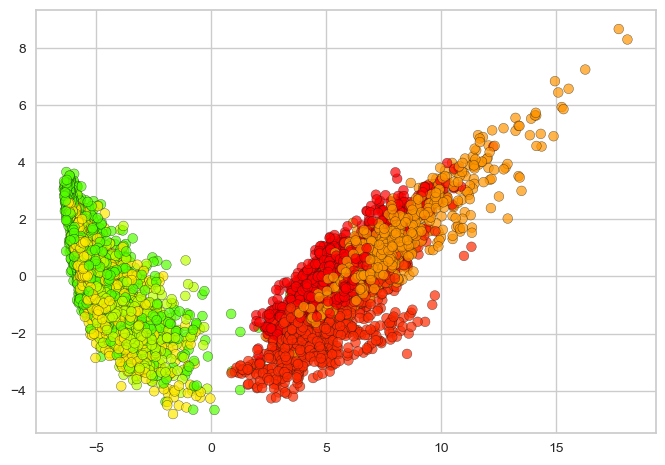

In [28]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, 
            cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [29]:
X_test_pca = pca.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_pca, y_train)

y_pred = clf.predict(X_test_pca)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.5222259925347811
F1-score [0.64816327 0.70630202 0.43441467 0.37746479 0.46067416 0.49492901]
              precision    recall  f1-score   support

           1       0.54      0.80      0.65       496
           2       0.80      0.63      0.71       471
           3       0.53      0.37      0.43       420
           4       0.35      0.41      0.38       491
           5       0.46      0.46      0.46       532
           6       0.54      0.45      0.49       537

    accuracy                           0.52      2947
   macro avg       0.54      0.52      0.52      2947
weighted avg       0.54      0.52      0.52      2947



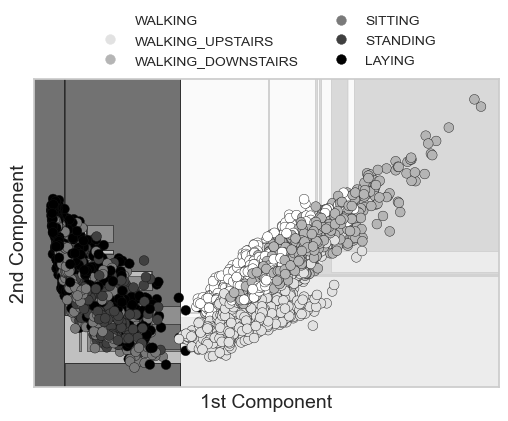

In [30]:
plot_decision_boundaries(X_train_pca[:,:2], y_train, clf, 
                         class_names = activities)

In [31]:
clf10 = KNeighborsClassifier(n_neighbors=5)
clf10.fit(X_train_pca, y_train)

y_pred = clf10.predict(X_test_pca)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.5415676959619953
F1-score [0.66231648 0.78300804 0.45655376 0.38120567 0.47359155 0.49180328]
              precision    recall  f1-score   support

           1       0.56      0.82      0.66       496
           2       0.85      0.72      0.78       471
           3       0.60      0.37      0.46       420
           4       0.34      0.44      0.38       491
           5       0.45      0.51      0.47       532
           6       0.66      0.39      0.49       537

    accuracy                           0.54      2947
   macro avg       0.58      0.54      0.54      2947
weighted avg       0.57      0.54      0.54      2947



C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


<Figure size 600x400 with 0 Axes>

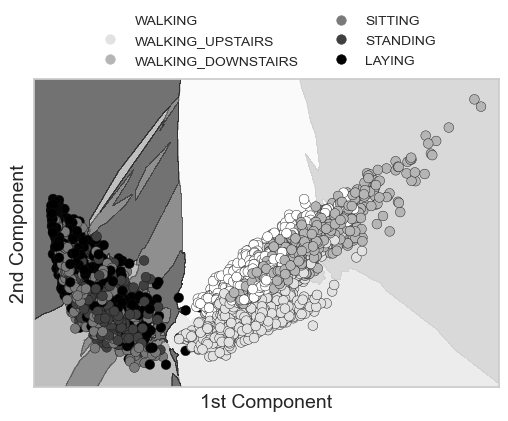

In [57]:
plt.figure(figsize = (6,4), tight_layout = True)
plot_decision_boundaries(X_train_pca[:,:2], y_train, clf10, 
                         class_names = activities)

In [34]:
clf11 = LogisticRegression(random_state=0)
clf11.fit(X_train_pca, y_train)

y_pred = clf11.predict(X_test_pca)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\Dell\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3505, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Dell\AppData\Local\Temp\ipykernel_13060\470926351.py", line 1, in <module>
    clf11 = LogisticRegression(random_state=0)
NameError: name 'LogisticRegression' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Dell\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2102, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "C:\Users\Dell\anaconda3\lib\site-packages\IPython\core\ultratb.py", line 1310, in structured_traceback
    return FormattedTB.structured_traceback(
  File "C:\Users\Dell\anaconda3\lib\site-packages\IPython\core\ultratb.py", line 1199, in structured_traceback
    return VerboseTB.structured_traceback(
  File "C:\Users\Dell\anaconda3\l

In [35]:
plot_decision_boundaries(X_train_pca[:,:2], y_train, clf11, 
                         class_names = activities)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\Dell\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3505, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Dell\AppData\Local\Temp\ipykernel_13060\2916772821.py", line 1, in <module>
    plot_decision_boundaries(X_train_pca[:,:2], y_train, clf11,
NameError: name 'clf11' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Dell\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2102, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "C:\Users\Dell\anaconda3\lib\site-packages\IPython\core\ultratb.py", line 1310, in structured_traceback
    return FormattedTB.structured_traceback(
  File "C:\Users\Dell\anaconda3\lib\site-packages\IPython\core\ultratb.py", line 1199, in structured_traceback
    return VerboseTB.structured_traceback(
  File "C:\Users\Dell\anacon

# ISOMAP

In [58]:
from sklearn.manifold import MDS, TSNE, Isomap

In [59]:
iso = Isomap(n_neighbors = 4, n_components = 7, n_jobs = -1)
X_train_iso = iso.fit_transform(X_train)
X_test_iso = iso.transform(X_test)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\Dell\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3505, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Dell\AppData\Local\Temp\ipykernel_13060\2443689482.py", line 2, in <module>
    X_train_iso = iso.fit_transform(X_train)
  File "C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\_set_output.py", line 140, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "C:\Users\Dell\anaconda3\lib\site-packages\sklearn\manifold\_isomap.py", line 373, in fit_transform
    self._fit_transform(X)
  File "C:\Users\Dell\anaconda3\lib\site-packages\sklearn\manifold\_isomap.py", line 241, in _fit_transform
    nbg = kneighbors_graph(
  File "C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_graph.py", line 128, in kneighbors_graph
    return X.kneighbors_graph(X=query, n_neighbors=n_neighbors, mode=mode)
  File "C:\Users\Dell\anaconda3\lib\site-packages\sklearn\nei

In [60]:
iso_dtc = DTC(random_state = 5).fit(X_train_iso, y_train)
y_pred_iso_dtc = iso_dtc.predict(X_test_iso)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\Dell\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3505, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Dell\AppData\Local\Temp\ipykernel_13060\173830621.py", line 1, in <module>
    iso_dtc = DTC(random_state = 5).fit(X_train_iso, y_train)
NameError: name 'DTC' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Dell\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2102, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "C:\Users\Dell\anaconda3\lib\site-packages\IPython\core\ultratb.py", line 1310, in structured_traceback
    return FormattedTB.structured_traceback(
  File "C:\Users\Dell\anaconda3\lib\site-packages\IPython\core\ultratb.py", line 1199, in structured_traceback
    return VerboseTB.structured_traceback(
  File "C:\Users\Dell\anaconda3\l

In [61]:
print(classification_report(y_test, y_pred_iso_dtc, 
                            target_names = activities.values()))

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\Dell\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3505, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Dell\AppData\Local\Temp\ipykernel_13060\723318966.py", line 1, in <module>
    print(classification_report(y_test, y_pred_iso_dtc,
NameError: name 'y_pred_iso_dtc' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Dell\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2102, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "C:\Users\Dell\anaconda3\lib\site-packages\IPython\core\ultratb.py", line 1310, in structured_traceback
    return FormattedTB.structured_traceback(
  File "C:\Users\Dell\anaconda3\lib\site-packages\IPython\core\ultratb.py", line 1199, in structured_traceback
    return VerboseTB.structured_traceback(
  File "C:\Users\Dell\anacon

In [ ]:
iso_knn = KNN().fit(X_train_iso, y_train)
y_pred_iso_knn = iso_knn.predict(X_test_iso)

In [ ]:
neighbors = [2,3,4,5,10,20,30]
iso_models = []
for n in neighbors:
    iso = Isomap(n_neighbors = n, n_components = 2, n_jobs = -1)
    X_train_iso = iso.fit_transform(X_train)
    iso_models.append(X_train_iso)

In [ ]:
fig = plt.figure(figsize = (14, 20))
plt.suptitle('Isomap', fontsize = 18)
for i, model in enumerate(iso_models, 1):
    ax = fig.add_subplot(4, 2, i)
    plot_scatter(model, y_train, activities, ax = ax, top_legend = False)
    plt.title(f'Number of neighbors = {neighbors[i-1]}', fontsize = 16)
    if i != 7:
        plt.legend([], [], frameon = False)
plt.show()

In [ ]:
iso = Isomap(n_neighbors = 4, n_components = 3, n_jobs = -1)
X_train_iso = iso.fit_transform(X_train)

In [ ]:
plot_scatter(X_train_iso, y_train, activities)
# plt.savefig('isomap_2d.pdf', bbox_inches = 'tight')
plt.show()

In [ ]:
plot_scatter3d(X_train_iso, y_train, activities)
# plt.savefig('isomap_3d.pdf', bbox_inches = 'tight')
plt.show()

In [ ]:
clf_dtc_iso = DTC(random_state = 5).fit(X_train_iso[:,:2], y_train)
plot_decision_boundaries(X_train_iso[:,:2], y_train, clf_dtc_iso, 
                         class_names = activities)
# plt.savefig('DTC_decision_boundaries_isomap.pdf', bbox_inches = 'tight')
plt.show()

In [ ]:
clf_knn_iso = KNN(n_jobs = -1).fit(X_train_iso[:,:2], y_train)
plot_decision_boundaries(X_train_iso[:,:2], y_train, clf_knn_iso, 
                         class_names = activities)
# plt.savefig('KNN_decision_boundaries_isomap.pdf', bbox_inches = 'tight')
plt.show()

# MDS

In [ ]:
mds = MDS(n_components = 2, random_state = 5)
X_train_mds = mds.fit_transform(X_train)

In [ ]:
plot_scatter(X_train_mds, y_train, activities)
# plt.savefig('mds_2d.pdf', bbox_inches = 'tight')
plt.show()

In [ ]:
mds3 = MDS(n_components = 3, random_state = 5)
X_train_3mds = mds3.fit_transform(X_train)

In [ ]:
plot_scatter3d(X_train_3mds, y_train, activities)
# plt.savefig('mds_3d.pdf', bbox_inches = 'tight')
plt.show()

In [ ]:
# non-metric MDS

mds_nonmetric = MDS(n_components = 2, random_state = 5, n_init = 10, 
            metric = False, n_jobs = 4)
X_train_nonmetric_mds = mds_nonmetric.fit_transform(X_train)

In [ ]:
clf_dtc_mds = DTC(random_state = 5).fit(X_train_mds, y_train)
plot_decision_boundaries(X_train_mds, y_train, clf_dtc_mds, 
                         class_names = activities)
# plt.savefig('DTC_decision_boundaries_mds.pdf', bbox_inches = 'tight')
plt.show()

In [ ]:
clf_knn_mds = KNN().fit(X_train_mds, y_train)
plot_decision_boundaries(X_train_mds, y_train, clf_knn_mds, 
                         class_names = activities)
# plt.savefig('KNN_decision_boundaries_mds.pdf', bbox_inches = 'tight')
plt.show()